In [15]:
%run src\mc\experiments.py
%run src\mc\distributions.py
%run src\mc\samplings.py

Introduction: 

Monte Carlo通过随机模拟实验来得到样本"频率"，进而推测整体"概率"。  
19世纪人们用投针试验的方法来决定圆周率\(\pi\)。随着计算机的普及，以大量模拟实验为核心思想的Monte Carlo得到了广泛使用。

TODO: MC的一些应用【被引高，近些年】 Zotero
。。。[]

背后原理： 大数定理

 The justification for a Monte Carlo method lies in the law of large numbers.

Functionality

experiments.py - provide simulations for solving numeric or probability problems, e.g., solving pi, calculating lottery expectations, etc.     
distributions.py - provide simulations for commonly used distributions, e.g., a sudden death game will produce the exponential distribution, the paper clip experiment will produce the zipf distribution, etc.     
samplings.py - used to verify the statistic / sampling distribution of commonly used hypothesis tests. e.g., the statistic of chi-squared GOF test follows the chisquare distribution. the statistic for ANOVA follows a F distribution, etc.

[TODO] Add a module-function table 
        


# 1. experiments.py 模拟仿真试验

## 利用仿真模拟计算  $\pi$

本实验从-1 ~ +1范围中均匀随机抽样，产生x和y。 定义函数 is_inside_unit_circle，判断点(x,y)是否落在单位圆内部。

In [3]:
pi(N = 100000000,flavor = 0) # 仿真模拟N次

frequency = 15918296/100000000 = 0.15918296
PI = 3.141039719326742


(0.15918296, 3.141039719326742)

## 双向击鼓传花

A、B、C、D、E五个人围成圆圈进行传球游戏，规定每人只能传给相邻的人（向左传或向右传）。   
由A开始游戏。

问：传球10次后，球回到A手中的概率是多少？  
请使用Monte Carlo方法进行计算，并与经典概率计算法比较

In [4]:
parcel(100000,5,10)

0.24836

经典概率解法：

$P = { { 2 + C_{10}^5 } \over { 2^ {10} } }= 24.8 \% $
        
两者值（近似）相同。仿真次数越多，值越相近。

<br/>


## 三个骰子点数

投掷3个色子。得分表如下：

|  Result  |     Reward ($)     |
|----------|:-------------:|
| 456 |  16  |
| 123 |  16  |
| ooo 三个相同 |  8  |
| oox 两个相同 |  2  |
| xyz 各不相同 |  0  |

计算各情况的概率，并确定单次的票价。

In [5]:
dict_pmf = dices(N = 10000)

,ooo,123,456,xyz,oox
Experimental Frequencies (f)N = 10000,0.0268,0.0294,0.0272,0.4956,0.421
Theoretical PMF (p),0.027778,0.027778,0.027778,0.498956,0.416667


In [6]:
# math expectation
dict_rewards = {'ooo': 8,
 '123': 16,
 '456': 16,
 'xyz': 0,
 'oox': 2}

E = 0
for key in dict_rewards:
    E = E + dict_pmf[key] * dict_rewards[key]
E

1.9619999999999997

Math expectation = 1.94. The ticket price must > 1.94. 3 or 4 dollars is preferred.

使用 scipy multinomial 计算理论值，符合多项式分布：

In [7]:
from scipy.stats import multinomial
rv = multinomial(3, [1/6]*6)
rv.pmf([1, 1, 1, 0, 0, 0]) # 123 或 456 的情况

0.02777777777777777

## 100 prisoners problem

Philippe Flajolet和Robert Sedgewick在2009年提出了“百囚犯问题（100 prisoners problem）”：

在某个法制不健全的国家， 监狱中有编号1到100的100名死刑犯。监狱长给了他们最后一次机会：

一个房间里有100个抽屉，监狱长随意地把1到100这100个号码放入1号到100号抽屉中，每个抽屉一张。囚犯们逐个进入房间，每人可以任意打开50个抽屉，之后关上。如果每名囚犯都在这50个抽屉中发现了他的号码，那么所有的犯人都会被赦免；如果有人没有找到他的号码，那么所有的囚犯都会被处死。在第一个囚犯进入房间之前，囚犯们允许一起讨论开抽屉的“策略”，但一旦第一个囚犯进入房间，他们之间就被禁止交流。

如果纯粹随机开抽屉，那么所有人都被赦免的概率只有 $ (1/2) ^{100} $ 。

策略：

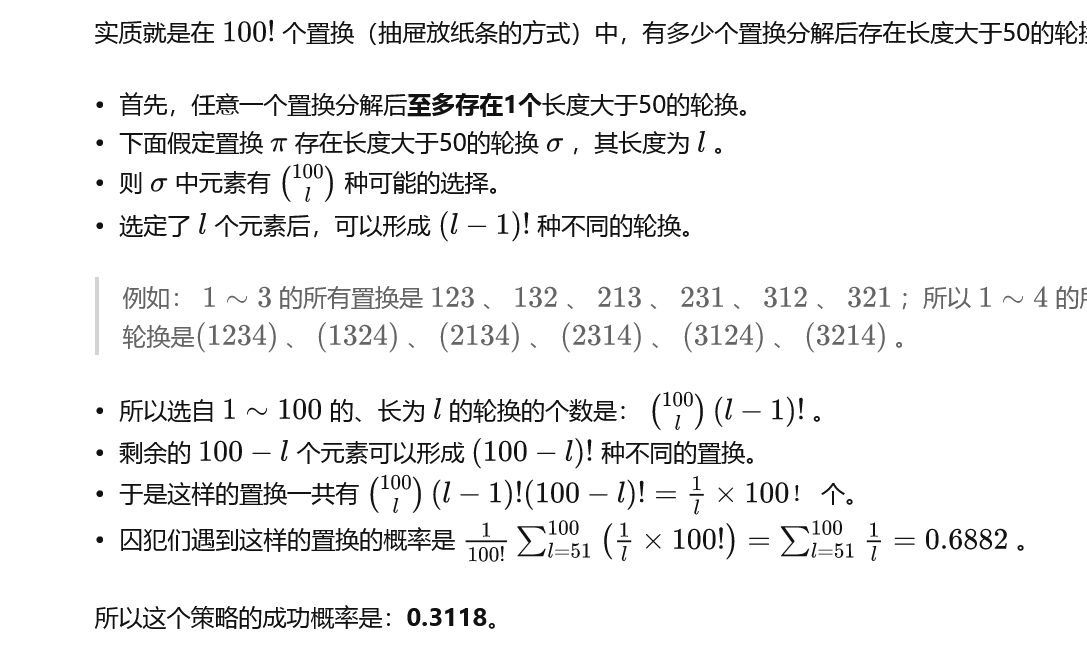

In [8]:
prisoners(n = 100, N = 1000)

0.336

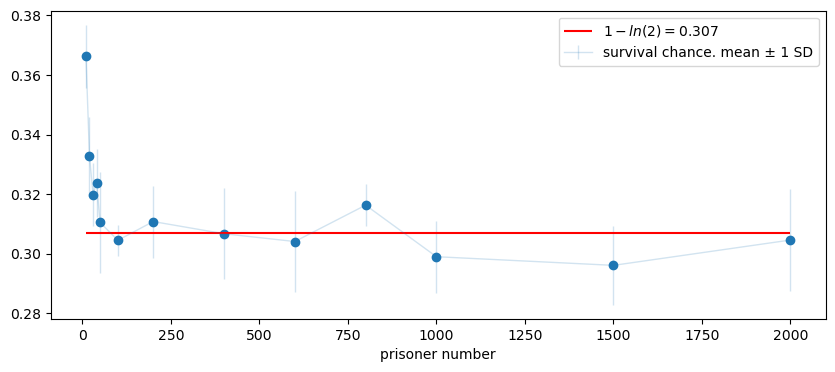

In [21]:
prisoners_limit(ns = [10, 20, 30, 40, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000], repeat = 10, SD = 1) # there is still noticeable fluctuations. users may try much bigger N to get stable result, but beware the run time may explode.

<hr/>

# 2. distributions.py 分布试验

TODO: 把每个分布的PDF/PMF公式、E,D,

e.g., b(n,p）， E(X) = np, D(X) = np(1-p)

## 二项式分布 - 高尔顿钉板实验


钉板上有20层钉板、21个落槽，请使用Monte Carlo算法求解球落入各个槽的概率(模拟1万次)。

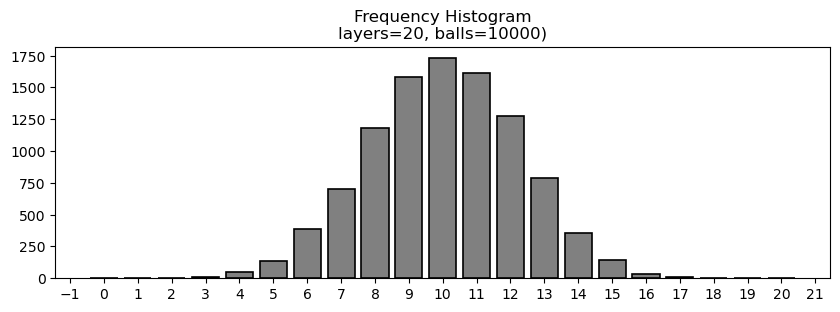

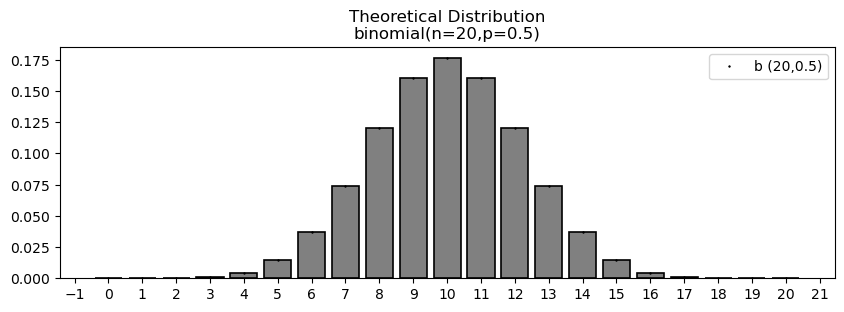

In [2]:
_ = galton_board(num_layers = 20, N = 10000, flavor=1)

经典概率解法：
$P(i) = {{ C_{L}^i } / { 2^L }}, i = \text { 0 to L } $, L 为钉板层数

## 泊松分布

    possion 是 b(n,p), n很大，p很小的一种极限分布
    假设一个容量为n的群体，每个个体发生特定事件（如意外或事故）的概率为p（极低），那么总体发生事件的总数近似符合泊松

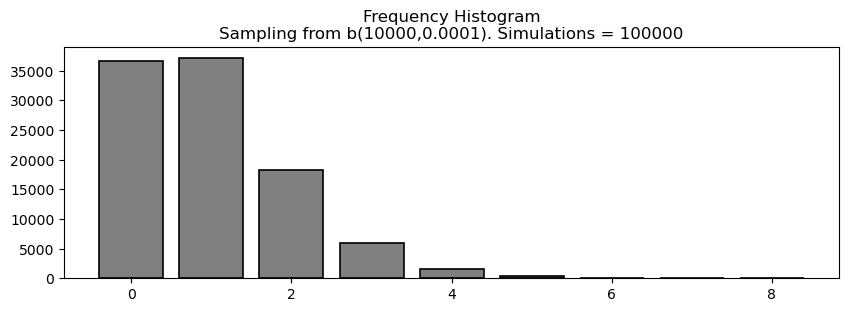

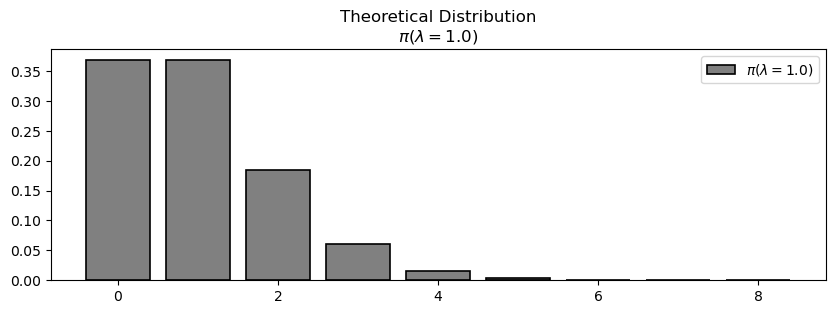

In [3]:
poisson()

# 指数分布 - 生存游戏

$X \sim E(\theta) $

PDF(概率密度函数)：

$ f(x; \theta) = \left\{
  \begin{array}{lr}
    {1 \over \theta} e ^{-x/\theta}, x>0\\
    0, else
  \end{array}
\right. $


元器件寿命为何符合指数分布？  
定义一个survival game（即每回合有p的死亡率；或电容在单位时间内被击穿的概率）的概率计算函数survival_dist。
取p = 0.001（每回合很小的死亡率），绘制出pmf曲线（离散、等比数组）

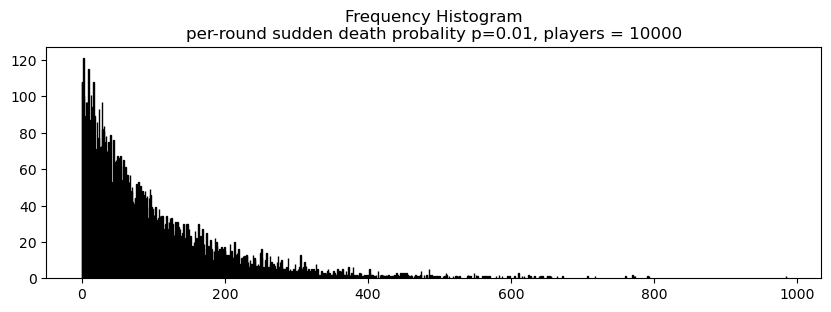

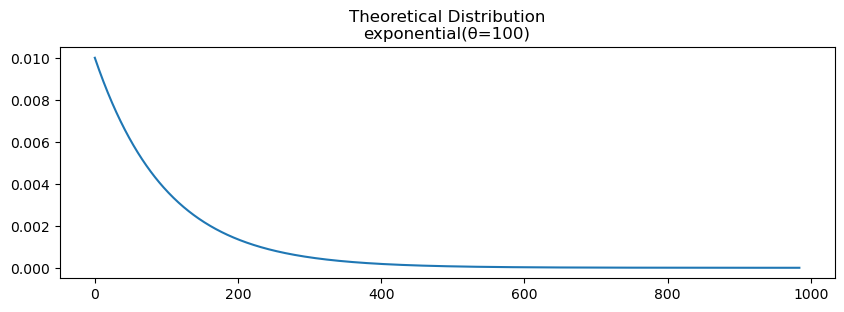

In [4]:
sudden_death(num_rounds = 1000, p = 0.01, N = 10000)

## 卡方分布

设$X_1,X_2,...,X_n$相互独立，都服从正态分布$N(\mu,\sigma^2)$,则$\chi^2 = \frac{1}{\sigma^2}\sum_{i=1}^{n}(X_{i}-\mu)^2\sim\chi^2(n)$.

    The squared sum of [k] r.v.s. from standard normal distributions is a chisq statistic.
    This function will verify it via [N] MC experiments.
    [k]个 N(0,1)^2 r.v.s. 的和为一个卡方分布的统计量
The pdf of the $\chi^2$ distribution with k(usually a positive whole number) degrees of freedom:
$f(x) = \frac{x^{\frac{k}{2}-1} e^\frac{-x}{2}}{2^\frac{k}{2} \Gamma(k/2)}$  for x $\geq$ 0.


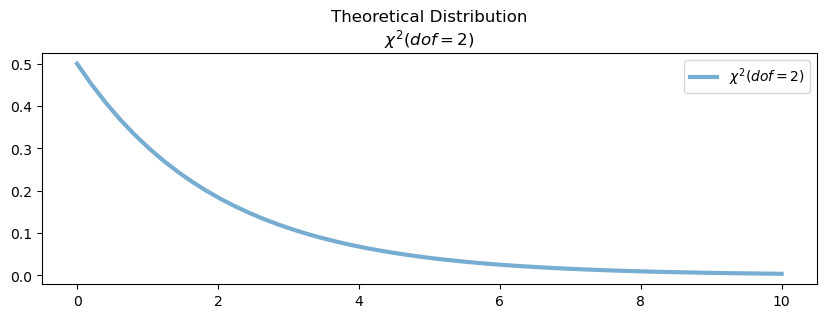

In [5]:
chisq_pdf_dist(k = 2, flavor = 1) # chisq_pdf_dist(flavor = 2)

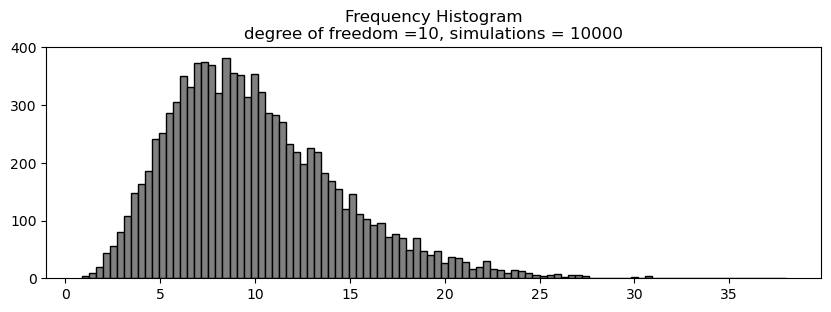

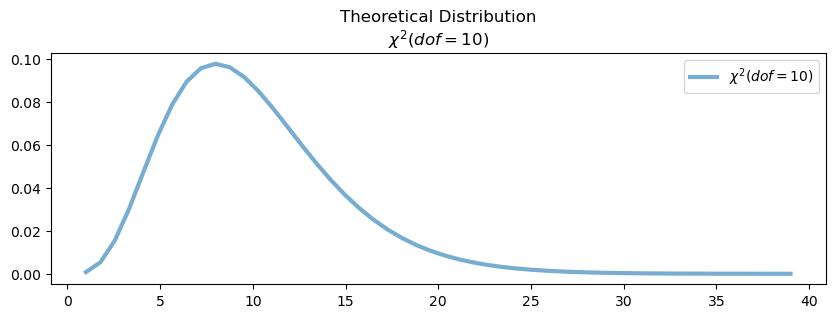

In [7]:
chisq(k=10, N = 10000)

## T分布
定义：设$X\sim N(0,1),Y\sim\chi^2(n)$,且X与Y相互独立，则称变量$t = \frac{X}{\sqrt{Y/n}}$ 所服从的分布为自由度为n的t分布。

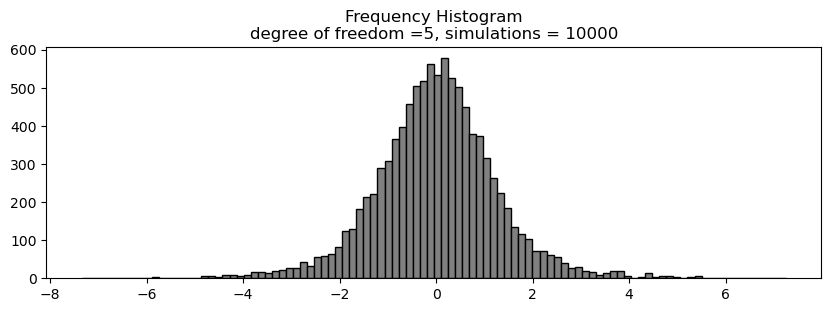

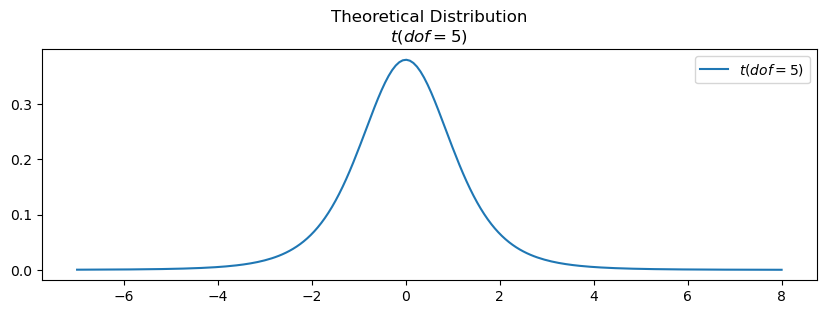

In [16]:
student()

## F 分布

定义：设$U \sim \chi^2(n_1),V \sim \chi^2(n_2)$,$U$与$V$相互独立，则称随机变量:
         
$F = \frac{U/n_1}{V/n_2}$

服从自由度为$n_1$及$n_2$的F分布，$n_1$称为第一自由度，$n_2$称为第二自由度，记作$F \sim F(n_1,n_2)$
           
由定义可见，$\frac{1}{F} = \frac{V/n_2}{U/n_2} \sim F(n_2,n_1)$

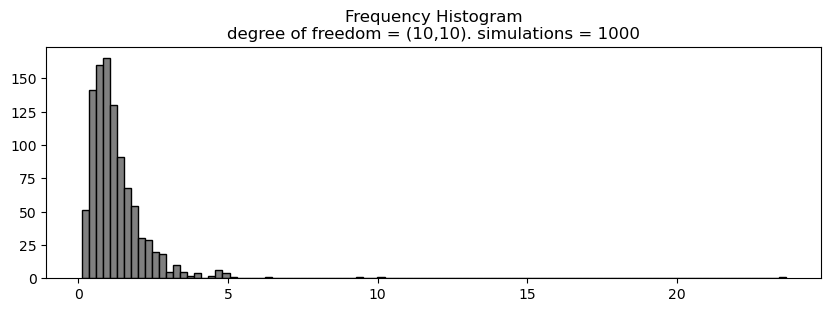

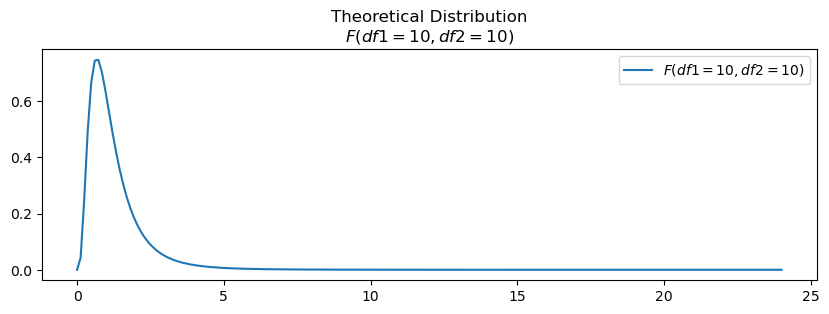

In [9]:
F()

# Zipf 分布 - 曲别针实验


由哈佛大学的语言学家乔治·金斯利·齐夫（George Kingsley Zipf）于1949年发表的实验定律。它可以表述为：在自然语言的语料库里，一个单词出现的频率与它在频率表里的排名成反比。  
二八定律、长尾定理、长尾分布、帕累托分布等

回形针试验：每次随机抽取两个，连接在一起后放回

The probability mass function for zipf is:

$f(k,a) = \frac{1}{\zeta(a)k^a}$
for $k\geq1,a >1$

zipf takes a > 1 as shape parameter.$\zeta$ is teh Riemann zeta function(scipy.special.zata)

$\zeta(x) = \sum_{n=1}^{\infty}(\frac{1}{n^x}) = \sum_{n=1}^{\infty}n^{-x}$

$\zeta(x) = \frac{1}{1^x}+\frac{1}{2^x}+\frac{1}{3^x}+\frac{1}{4^x}+...$

...

$\zeta(1) = \frac{1}{1}+\frac{1}{2}+\frac{1}{3}+\frac{1}{4}+...=+\infty$


$\zeta(2) = \frac{1}{1^2}+\frac{1}{2^2}+\frac{1}{3^2}+\frac{1}{4^2}+...=\frac{\pi^2}{6}$


$\zeta(-1) = 1+2+3+4+...=-\frac{1}{12}$


$\zeta(-2) = 1^2+2^2+3^2+4^2+...=0$

$\zeta(s) = \frac{1}{\Gamma(s)}\int_{0}^{\infty}\frac{x^{s-1}}{e^x-1}dx$

最后一个为复数域的解析延拓

$\zeta(s) = \frac{1}{(1-\frac{1}{2^s})(1-\frac{1}{3^s})(1-\frac{1}{5^s})(1-\frac{1}{7^s})...}$

$\zeta(s) = \prod\frac{1}{1-\frac{1}{p^s}}$,p是质数

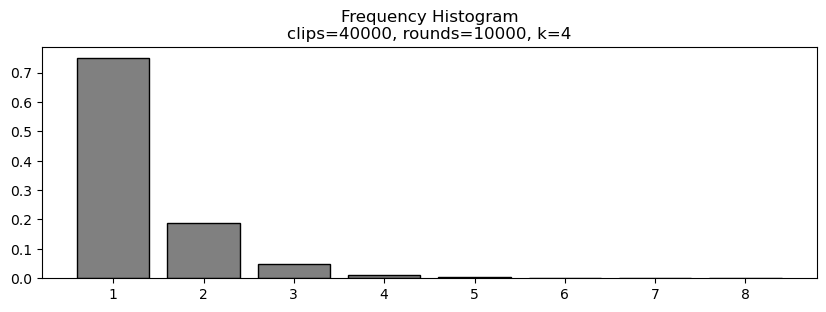

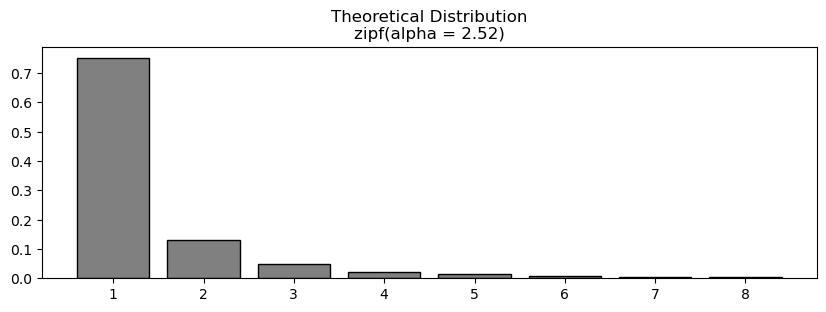

In [10]:
paper_clips(num_rounds = 10000, num_clips_k = 4)

## Benford's law

Also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small.

本福特定律揭示了十进制数据的一个统计学规律，即首位数字出现的概率为：

d 	1 	2 	3 	4 	5 	6 	7 	8 	9   
p 	30.1% 	17.6% 	12.5% 	9.7% 	7.9% 	6.7% 	5.8% 	5.1% 	4.6%

“apply to a wide variety of data sets, including electricity bills, street addresses, stock prices, population numbers, death rates, lengths of rivers, physical and mathematical constants, and processes described by power laws (which are very common in nature).”

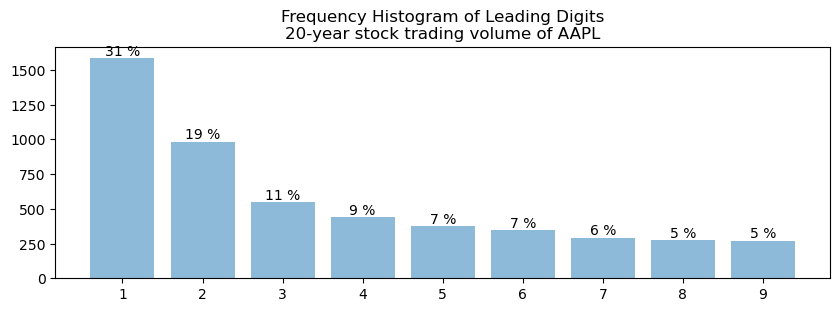

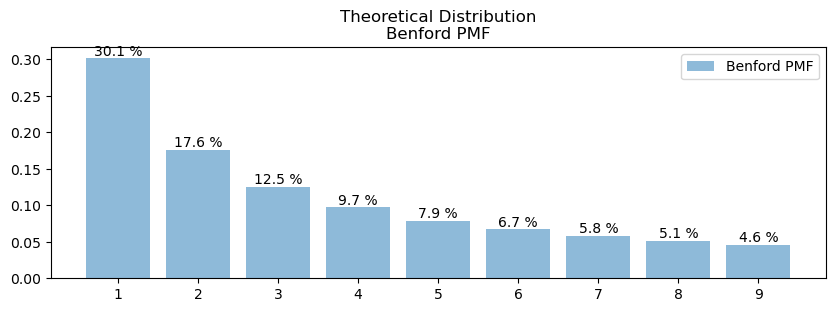

In [11]:
benford('stock')

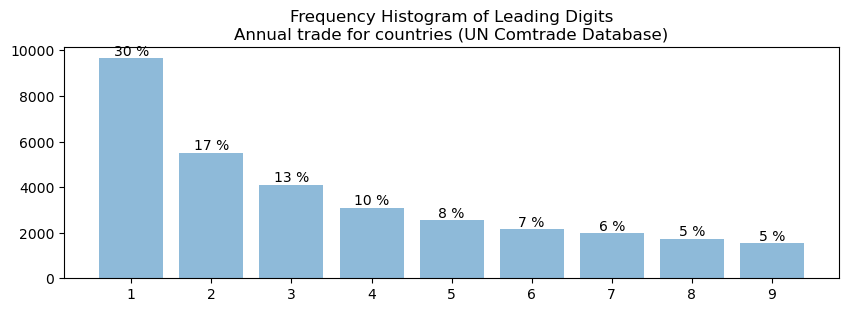

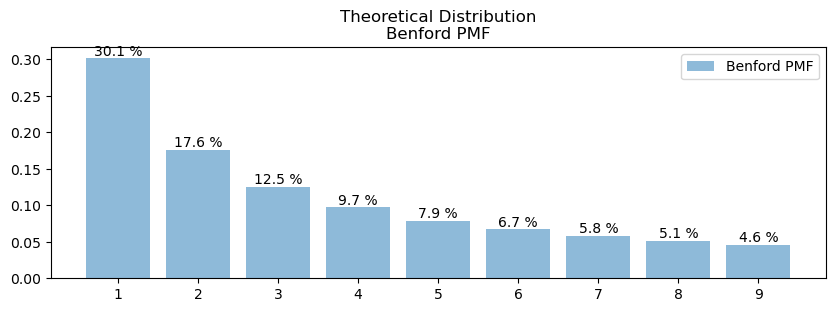

In [12]:
benford('trade')

The fibonacci series represents how a population (e.g., rabbits) grows in a resource-unlimited environment.   
In intuitive explanation of why it follows Benford: at a steady breeding speed, it takes much longer time from 1000 to 2000 (need to increase by 1000) than from 900 to 1000 (only need to increase by 100). Therefore, it stays longer at leading digit 1 than other digits.

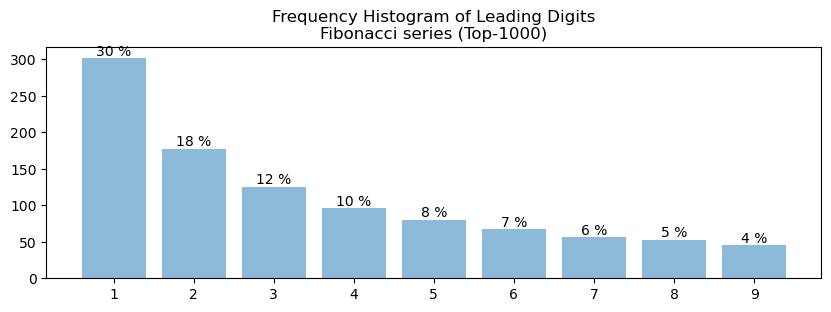

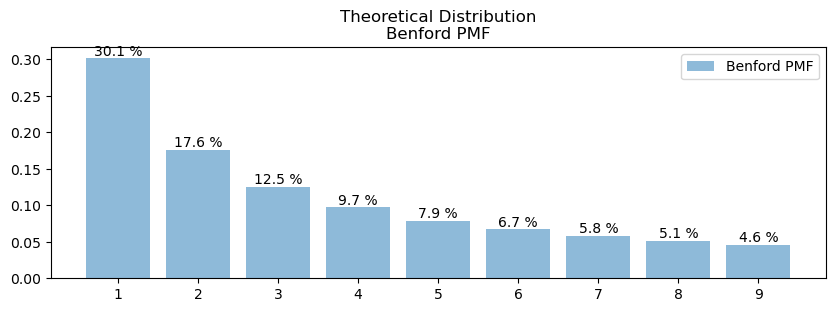

In [13]:
benford('fibonacci', N = 1000)

<hr/>

# 3. samplings.py 抽样分布及假设检验统计量的分布试验

## 中心极限定理 CLT

----------- uniform -----------


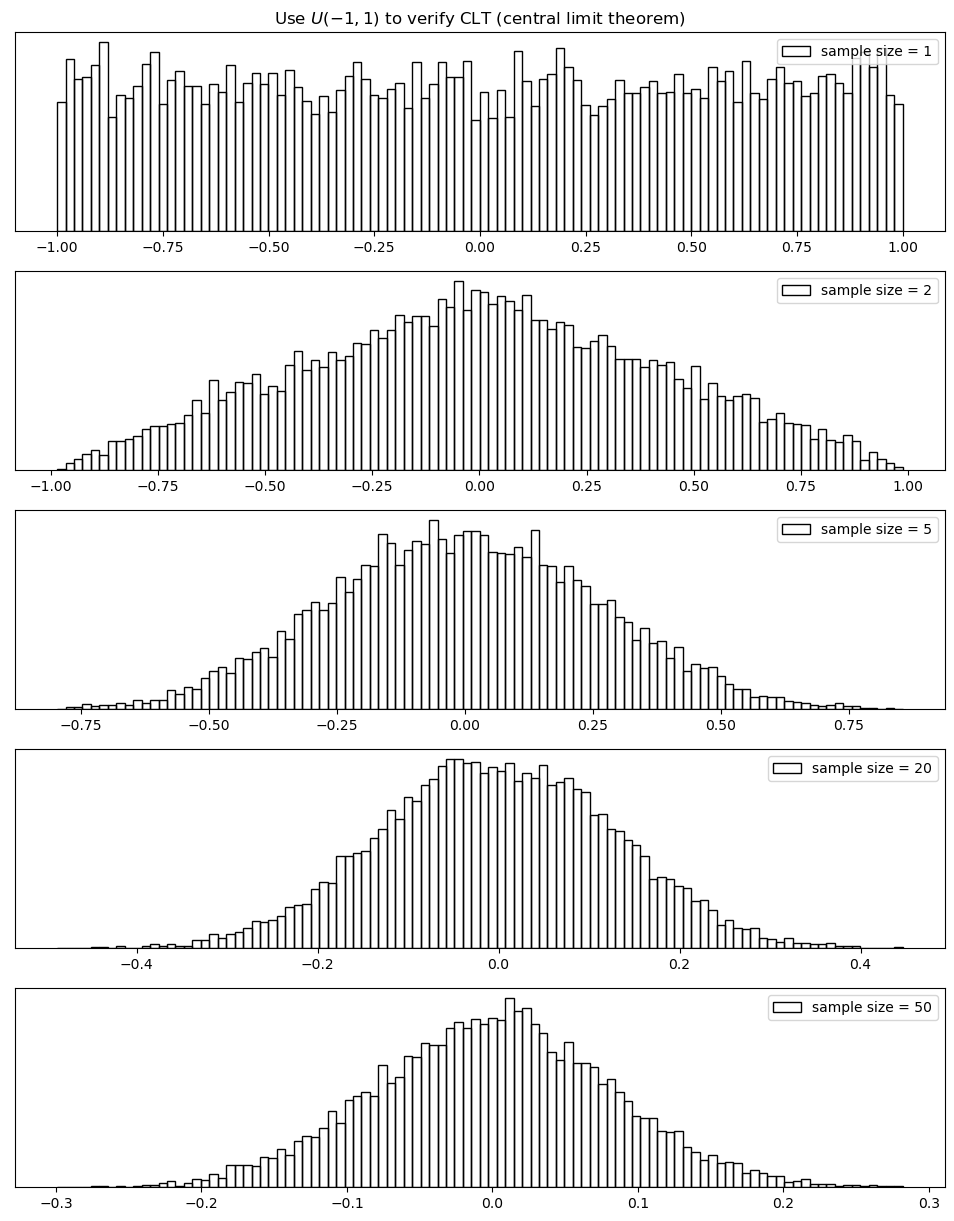

----------- expon -----------


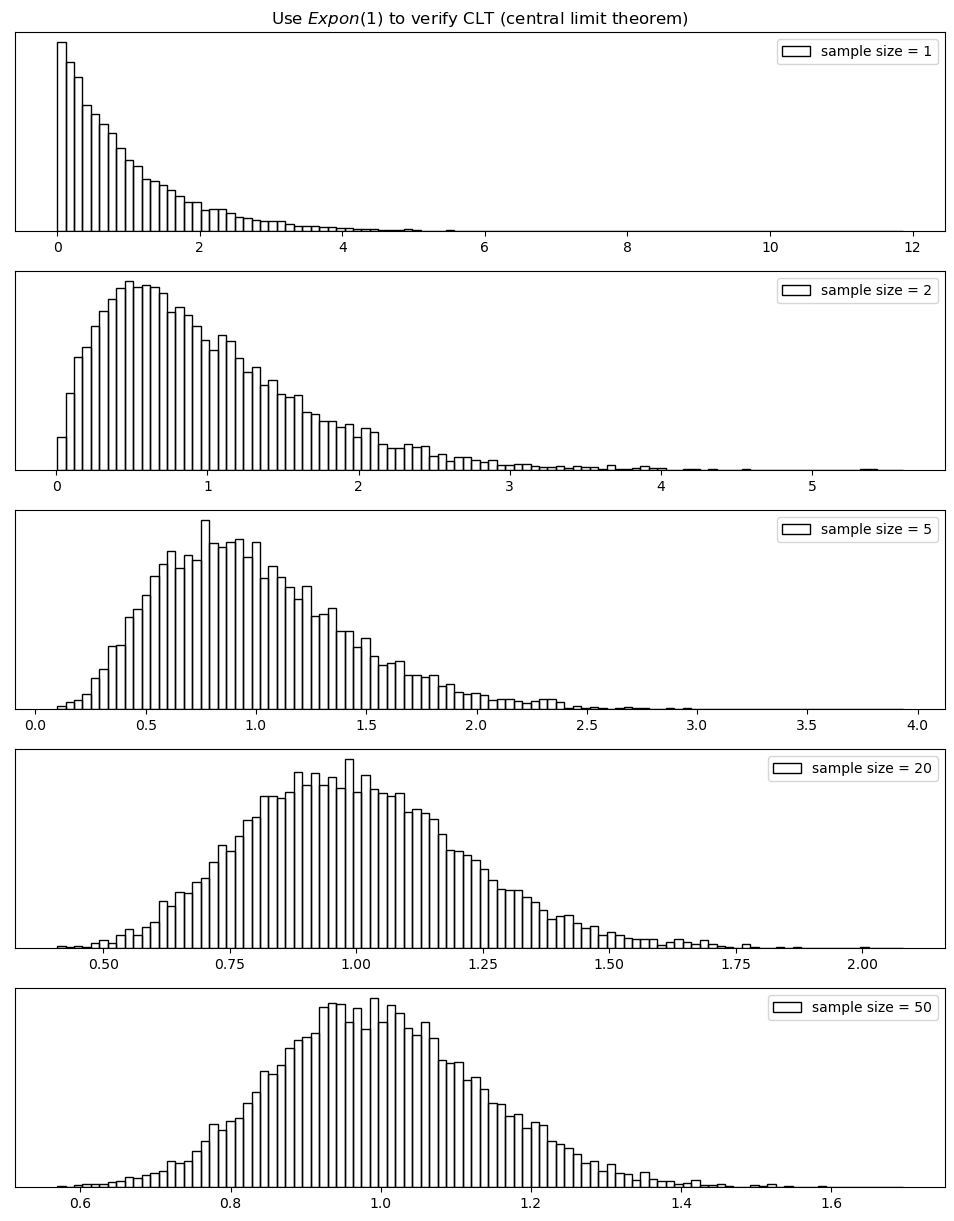

----------- poisson -----------


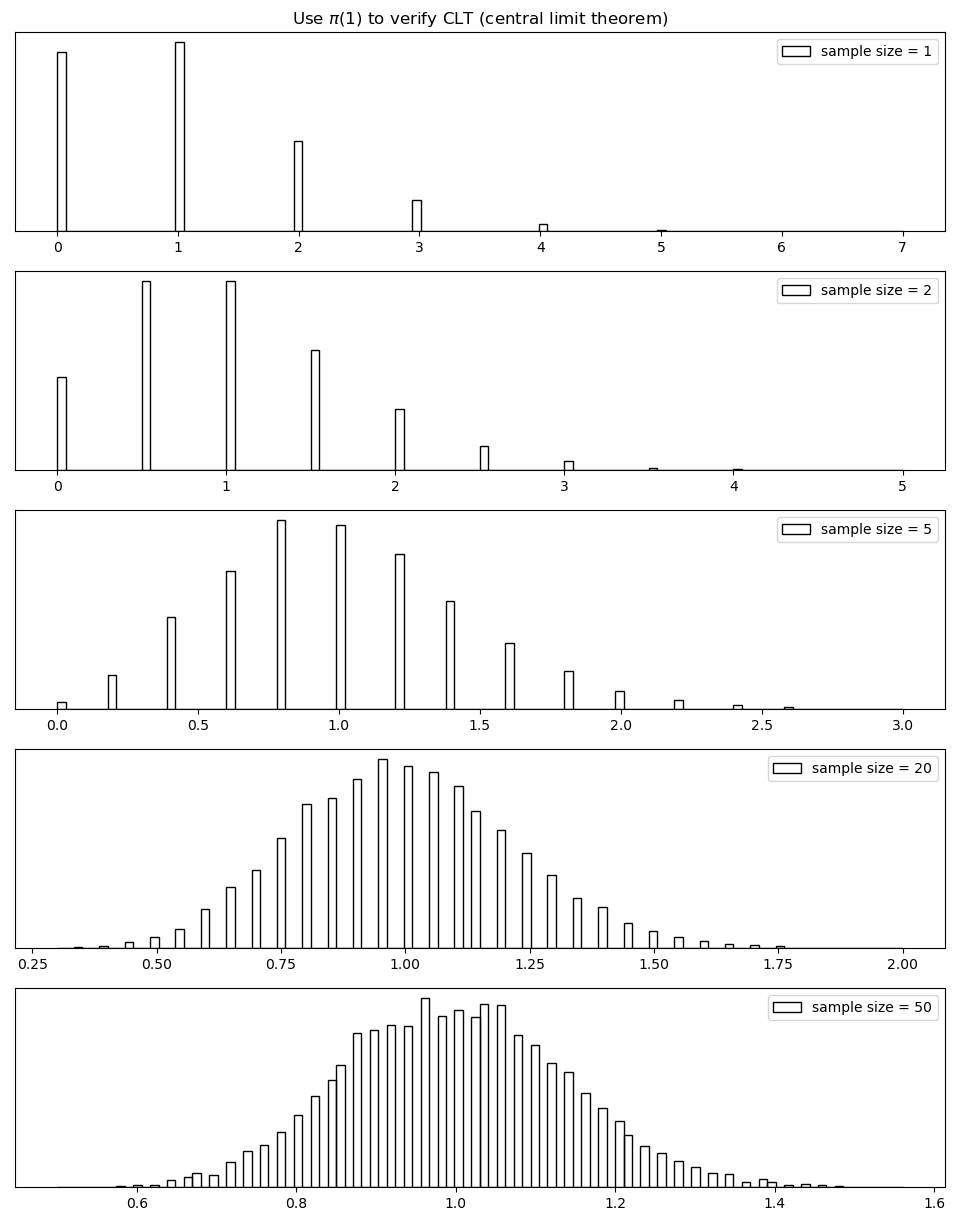

----------- coin -----------


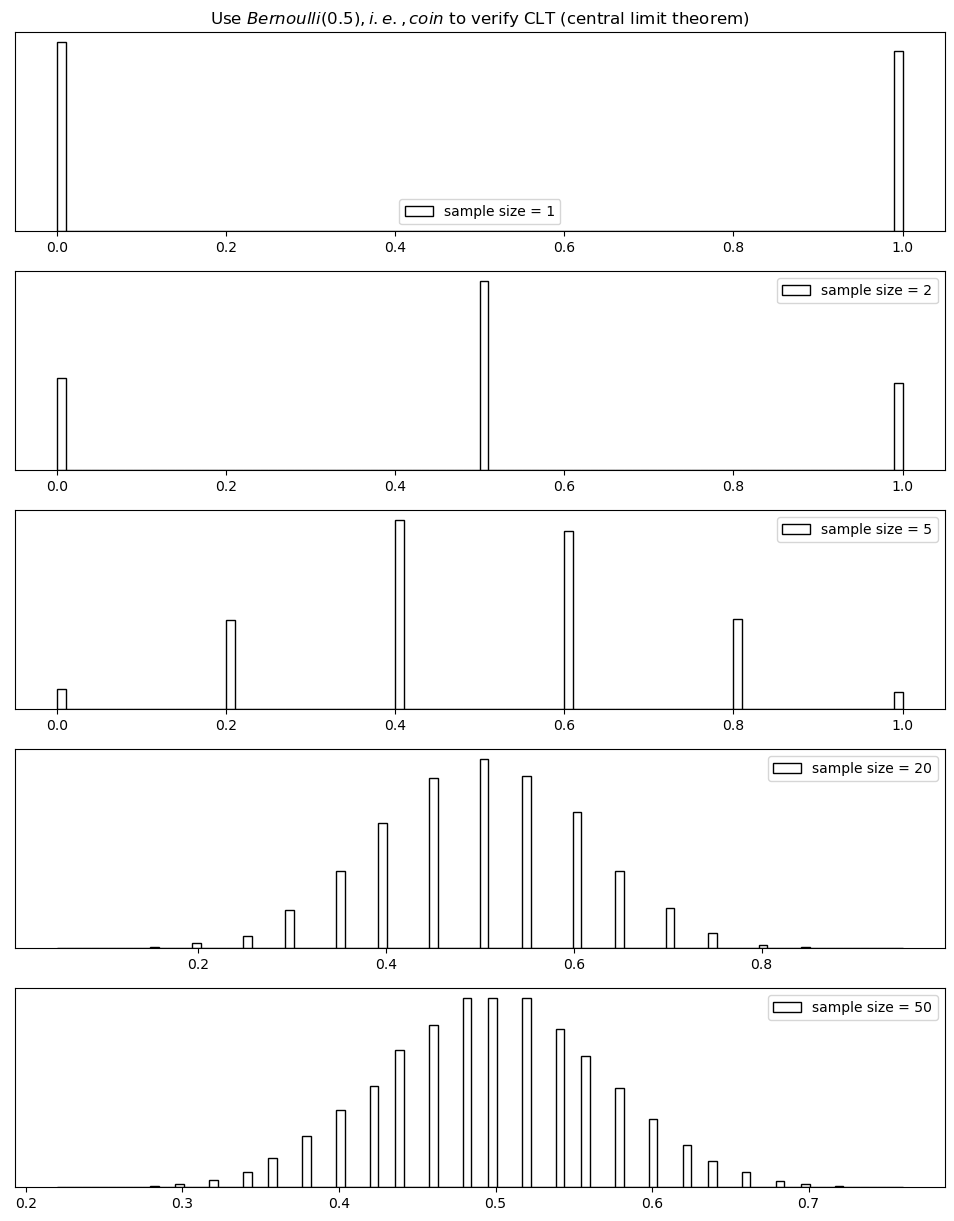

----------- tampered_coin -----------


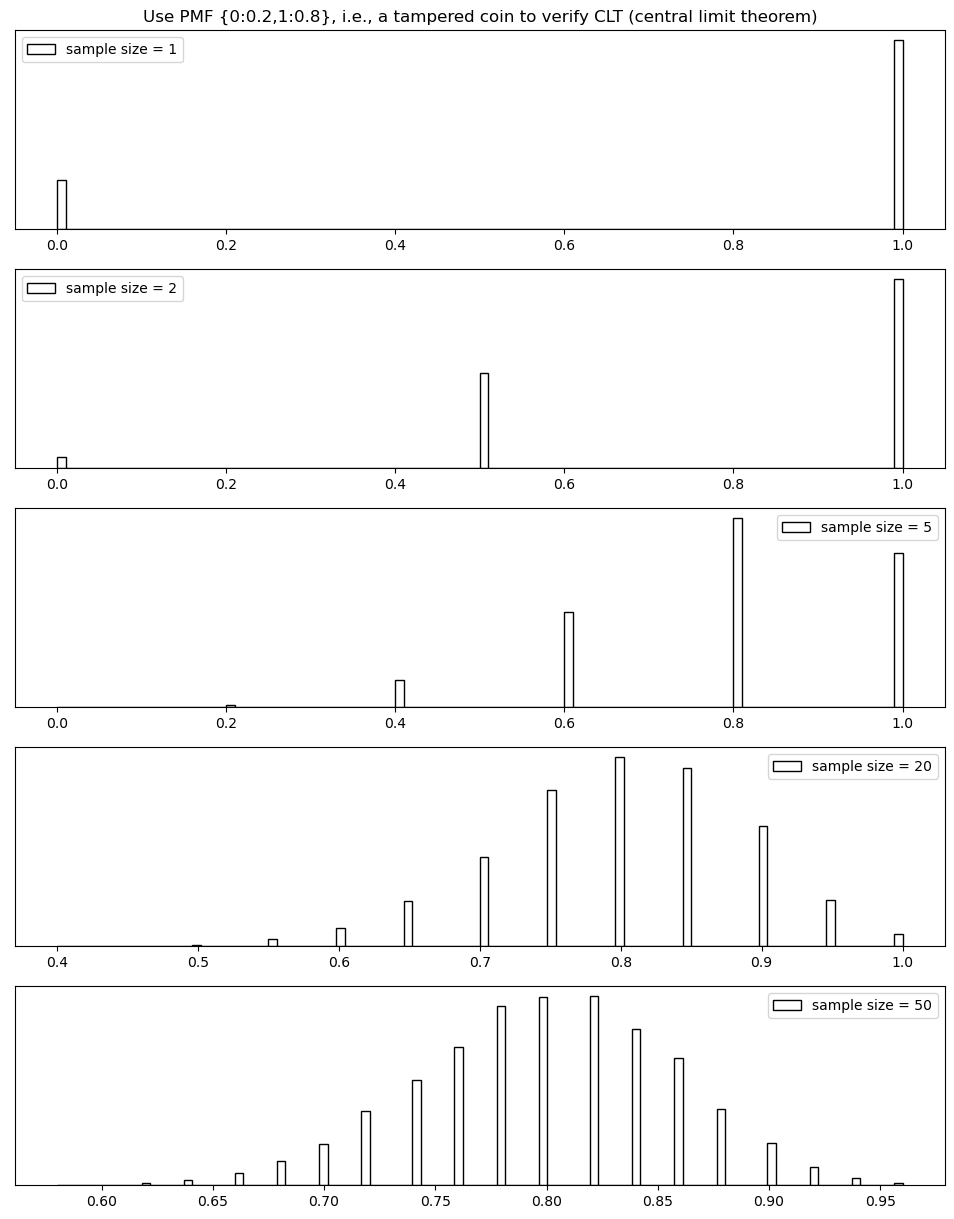

----------- dice -----------


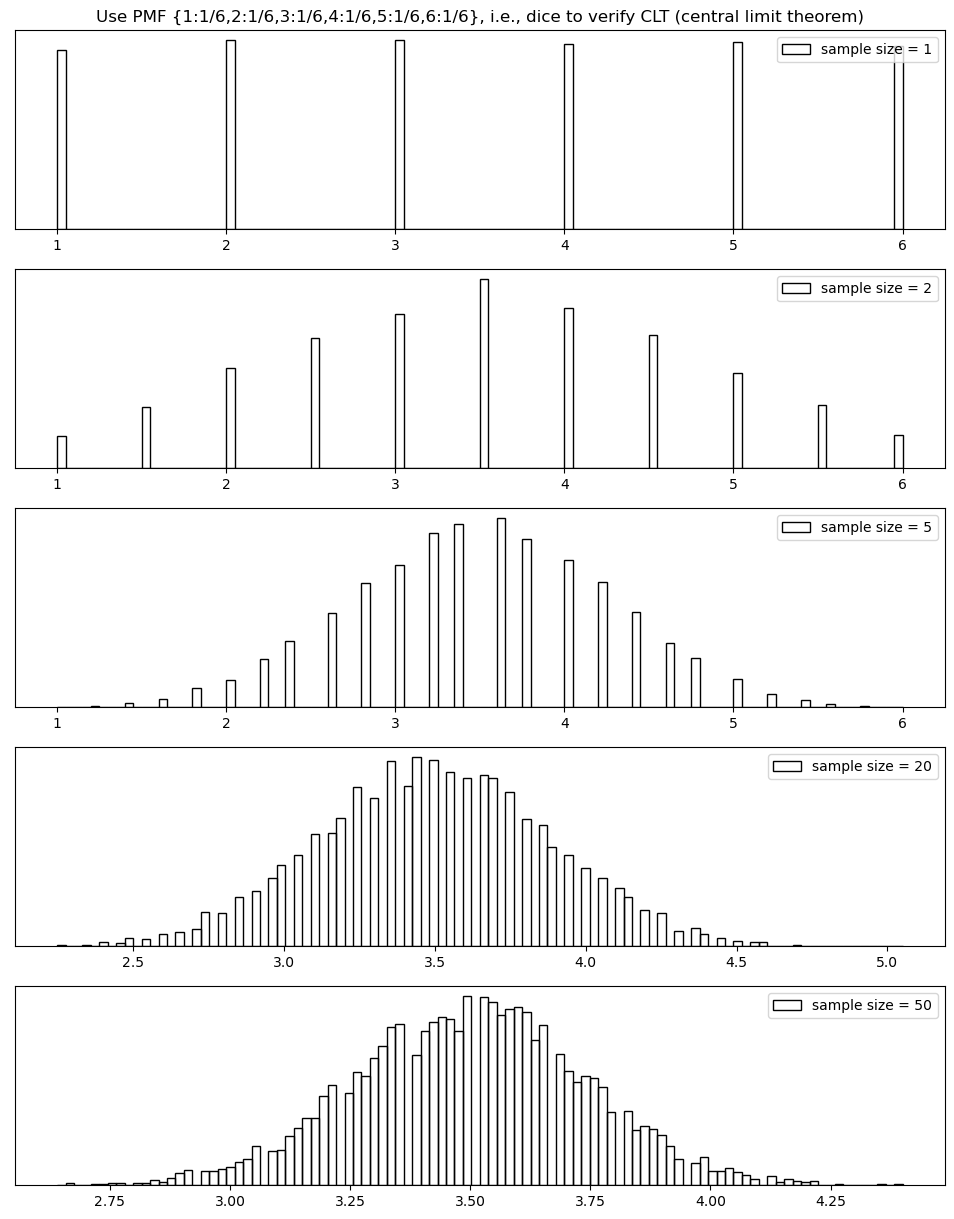

----------- tampered_dice -----------


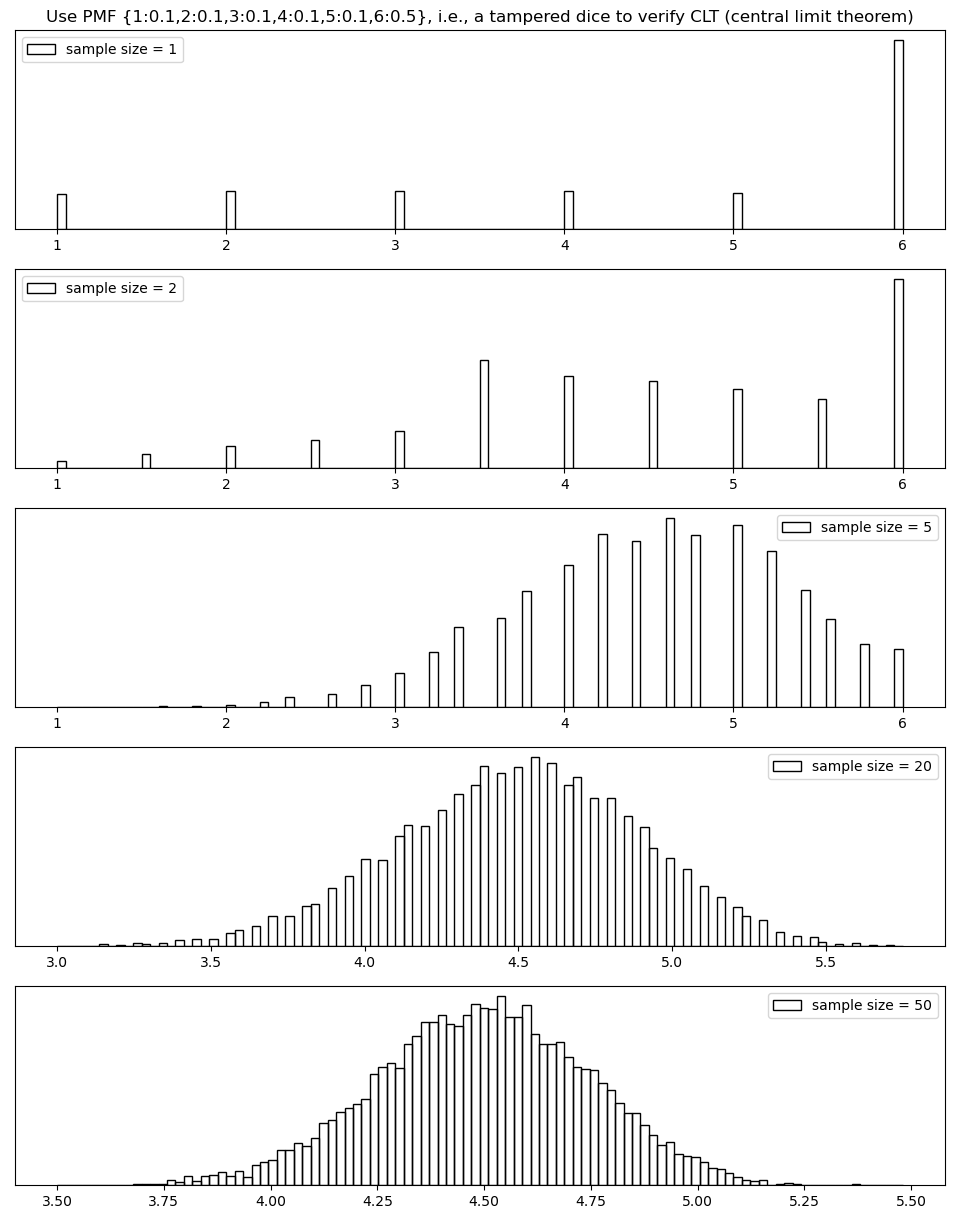

In [14]:
for dist in ['uniform', 'expon', 'poisson', 'coin', 'tampered_coin', 'dice', 'tampered_dice']:
    print('-----------', dist, '-----------')
    clt(dist, sample_size = [1,2,5,20,50], N = 10000)

## 验证 Pearson's Chi-Square Goodness-of-Fit Test

皮尔逊卡方拟合优度检验有一个基本的卡方分布假设，即

$\chi^2 = \sum_{j=1}{k}\frac{(f_{j}-np_{j})^2}{np_i} \sim \chi^2(k-1)$

当n充分大($n \geq 50$)时，$\chi^2$近似服从$\chi^2(k-1)$分布。

### 1. 下面用高尔顿钉板实验 b(n,p) 来验证

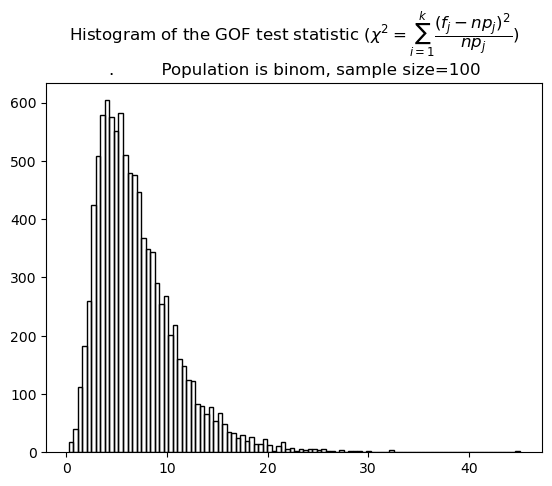

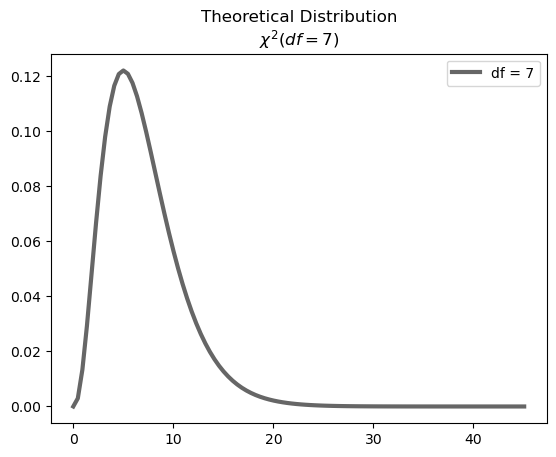

In [15]:
chisq_stat(dist = 'binom', K = 8, sample_size = 100, N = 10000)

### 2. 色子实验来验证

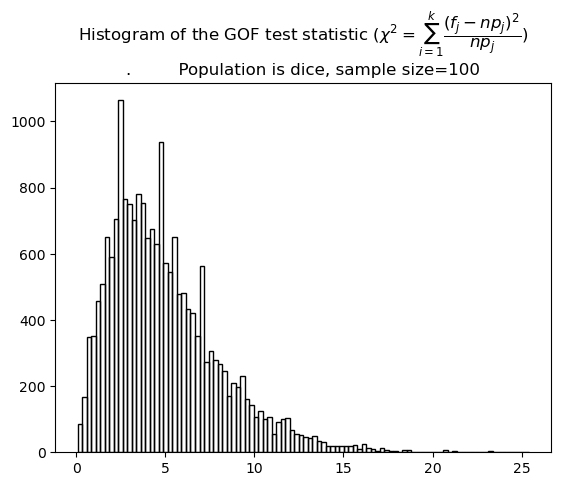

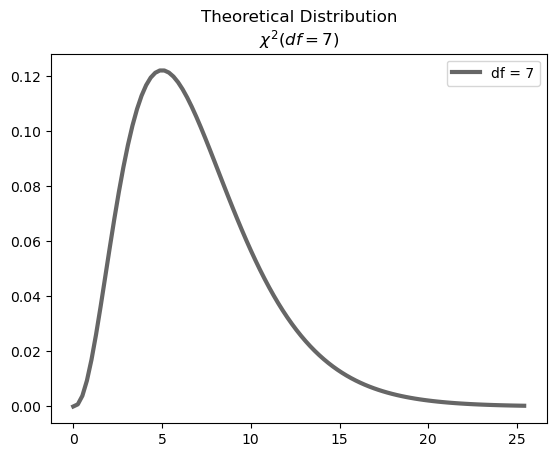

In [16]:
chisq_stat(dist = 'dice', K = 8, sample_size = 100, N = 10000)

验证完毕，抽样分布的结果符合 Pearson's Chi-Square 的理论分布假设

## 验证 ANOVA的F分布假设

F = MSTR/MSE ~ F(k-1, n-k)

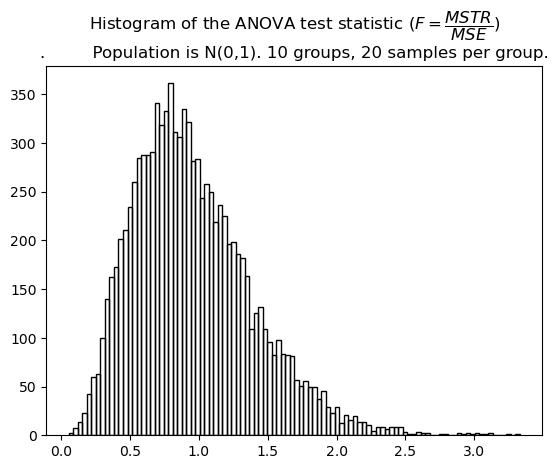

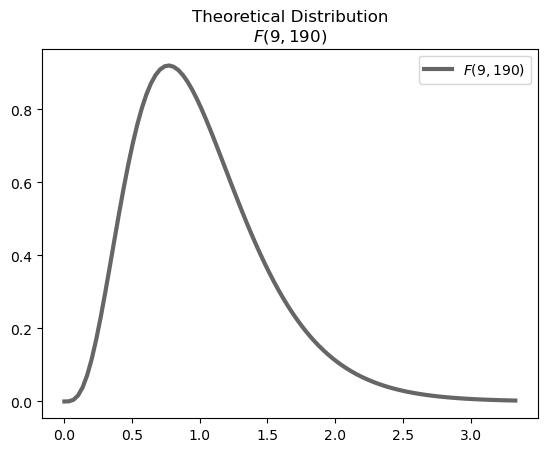

In [17]:
anova_stat(K = 10, n = 20, N = 10000)

验证完毕，抽样分布的结果符合F分布

## Kruskal-Wallis test

The Mann-Whitney or Wilcoxon test compares two groups while the Kruskal-Wallis test compares 3.  
Kruskal-Wallis test is a non-parametric version of one-way ANOVA. It is rank based.  
Kruskal-Wallis H: a X2 test statistic.

$H = [{\dfrac{12}{n_{T}(n_{T}+1)}\sum_{i=1}^{k}\dfrac{R_{i}^2}{n_{i}}]-3(n_{T}+1)}$

$K$=number of populations

$n_i$=the number of observations in sample i

$n_T$=$\sum_{i=1}^{k}n_i$=the total number of observations in all samples

$R_i$=the sum of the ranks for sample

以下用MC检验，3组N(0,1) 或 U(0,1)总体 或 其它分布，相等观察数

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8639.98it/s]


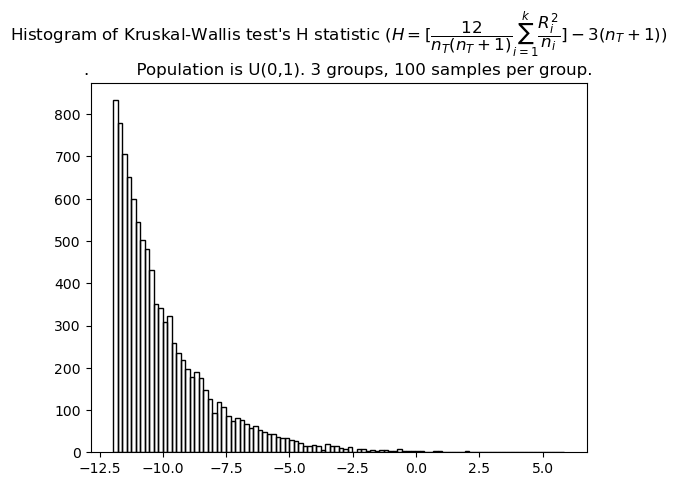

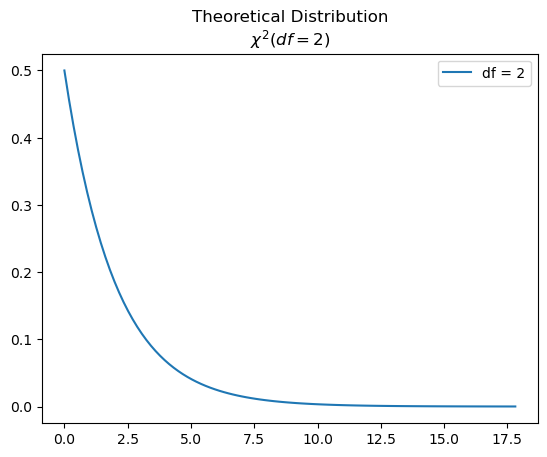

In [18]:
kw_stat()

# 符号检验

统计量符合二项式分布

1. Calculate $X_i - m_0$  for i = 1,2,...,n.
2. Define $N-$ = the number of negative signs obtained upon calculating $X_i - m_0$  for i = 1,2,...n.
2. Define $N+$ = the number of positive signs obtained upon calculating $X_i - m_0$  for i = 1,2,...n.

Then, if the null hypothesis is true, that is, $m=m_0$,then $N-$ and $N+$ both follow a binomial distribution with parameters $n$ and $p = 1/2$. That is: 

$N- \sim b(n,\frac{1}{2})$ and $N+ \sim b(n,\frac{1}{2})$

案例: 指数分布

$0.5 = \int_{m}^{-\infty}f(x)dx$

The theoretical median is m = $ \theta ln(2) $

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 57625.54it/s]


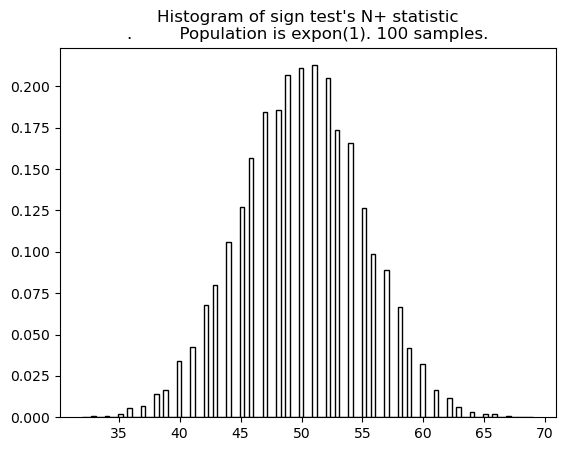

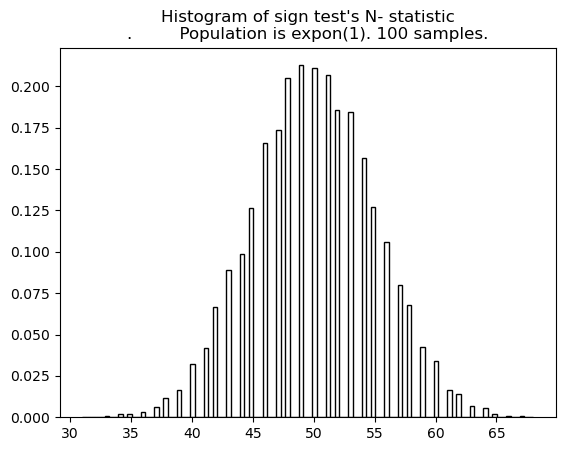

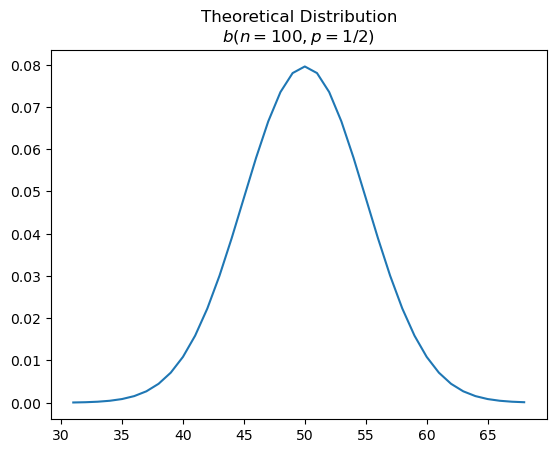

In [19]:
sign_test_stat(dist = 'expon', n = 100, N = 10000)

## Cochrane-Q 统计量的卡方抽样分布

Cochran Q Test - A extension to McNemar Test

Null Hypothesis($H_0$): The proportion of "successes" is the same in all group.

$T = \dfrac{(k-1)[k\sum_{j=1}^{k}X_{.j}^2-(\sum_{j=1}^{k} X_{.j})^2]}{k\sum_{i=1}^{b}X_{i.}-\sum_{i=1}^{b} X_{i.}^2}$

where:

$k$: The number of treaments (or "groups")

$x_{.j}$:The column total for the $j^{th}$ treatment

$b$: The number of blocks

$x_{i.}$:The row total for the $i^{th}$ block

$N$:The grand totral

The test statistic $T$ follows a Chi-Square distribution with k-1 degreee of freedom.

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 20843.84it/s]


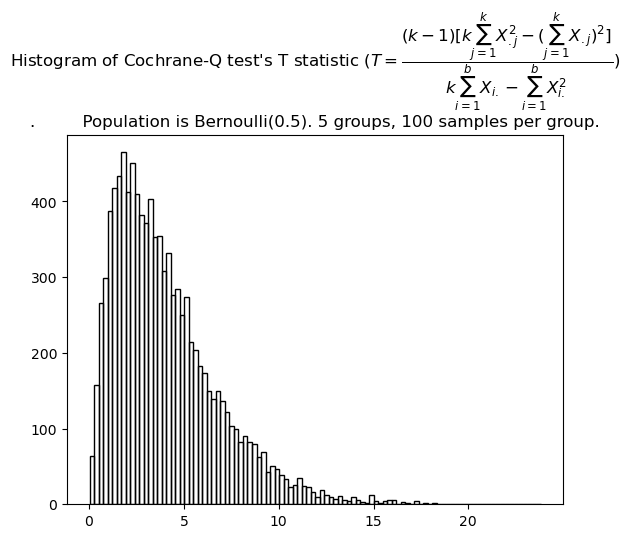

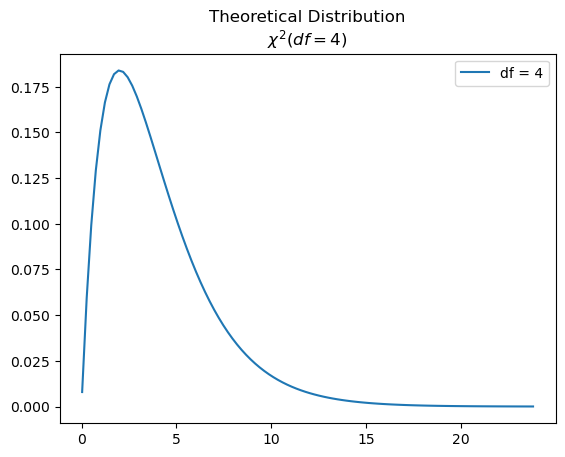

In [20]:
cochrane_q_stat(p = 0.5, K = 5, n = 100, N = 10000)

## Hotelling's T2 统计量  TODO: rewrite the markdown code and implement the function

https://encyclopediaofmath.org/wiki/Hotelling-T%5E2-distribution

<div id="InnerContent">
			
			
The continuous probability distribution, concentrated on the positive semi-axis  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><mn>0</mn><mo>,</mo><mi mathvariant=&quot;normal&quot;>&amp;#x221E;</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 3.302em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.72em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.275em, 1002.63em, 2.623em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="mo" id="MathJax-Span-3" style="font-family: MathJax_Main;">(</span><span class="mn" id="MathJax-Span-4" style="font-family: MathJax_Main;">0</span><span class="mo" id="MathJax-Span-5" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-6" style="font-family: MathJax_Main; padding-left: 0.167em;">∞</span><span class="mo" id="MathJax-Span-7" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.369em; border-left: 0px solid; width: 0px; height: 1.339em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mn>0</mn><mo>,</mo><mi mathvariant="normal">∞</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-1">  ( 0, \infty ) </script>, 
with density
</p><p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center; opacity: 1;"><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>p</mi><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mtext>&amp;#xA0;</mtext><mfrac><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x0393;</mi><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>(</mo><mi>n</mi><mo>+</mo><mn>1</mn><mo stretchy=&quot;false&quot;>)</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow><mo stretchy=&quot;false&quot;>)</mo><msup><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>k</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><mo stretchy=&quot;false&quot;>(</mo><mn>1</mn><mo>+</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mi>n</mi></mrow><msup><mo stretchy=&quot;false&quot;>)</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>(</mo><mi>n</mi><mo>+</mo><mn>1</mn><mo stretchy=&quot;false&quot;>)</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow></mrow></msup></mrow><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x0393;</mi><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>(</mo><mi>n</mi><mo>&amp;#x2212;</mo><mi>k</mi><mo>+</mo><mn>1</mn><mo stretchy=&quot;false&quot;>)</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow><mo stretchy=&quot;false&quot;>)</mo><mi mathvariant=&quot;normal&quot;>&amp;#x0393;</mi><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>k</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow><mo stretchy=&quot;false&quot;>)</mo><msup><mi>n</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>k</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow></mrow></msup></mrow></mfrac><mo>,</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-8" style="width: 23.498em; display: inline-block;"><span style="display: inline-block; position: relative; width: 19.56em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.513em, 1019.49em, 3.542em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-9"><span class="mi" id="MathJax-Span-10" style="font-family: MathJax_Math; font-style: italic;">p</span><span class="mo" id="MathJax-Span-11" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-12" style="font-family: MathJax_Math; font-style: italic;">x</span><span class="mo" id="MathJax-Span-13" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-14" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mtext" id="MathJax-Span-15" style="font-family: MathJax_Main; padding-left: 0.278em;">&nbsp;</span><span class="mfrac" id="MathJax-Span-16"><span style="display: inline-block; position: relative; width: 15.632em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(2.926em, 1015.51em, 4.417em, -1000em); top: -4.728em; left: 50%; margin-left: -7.756em;"><span class="mrow" id="MathJax-Span-17"><span class="mi" id="MathJax-Span-18" style="font-family: MathJax_Main;">Γ</span><span class="mo" id="MathJax-Span-19" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-20"><span class="mrow" id="MathJax-Span-21"><span class="mo" id="MathJax-Span-22" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-23" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-24" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mn" id="MathJax-Span-25" style="font-family: MathJax_Main; padding-left: 0.222em;">1</span><span class="mo" id="MathJax-Span-26" style="font-family: MathJax_Main;">)</span><span class="texatom" id="MathJax-Span-27"><span class="mrow" id="MathJax-Span-28"><span class="mo" id="MathJax-Span-29" style="font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-30" style="font-family: MathJax_Main;">2</span></span></span><span class="mo" id="MathJax-Span-31" style="font-family: MathJax_Main;">)</span><span class="msubsup" id="MathJax-Span-32"><span style="display: inline-block; position: relative; width: 2.626em; height: 0px;"><span style="position: absolute; clip: rect(3.377em, 1000.52em, 4.178em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-33" style="font-family: MathJax_Math; font-style: italic;">x</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.572em;"><span class="texatom" id="MathJax-Span-34"><span class="mrow" id="MathJax-Span-35"><span class="texatom" id="MathJax-Span-36"><span class="mrow" id="MathJax-Span-37"><span class="mi" id="MathJax-Span-38" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">k</span><span class="texatom" id="MathJax-Span-39"><span class="mrow" id="MathJax-Span-40"><span class="mo" id="MathJax-Span-41" style="font-size: 70.7%; font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-42" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span class="mo" id="MathJax-Span-43" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-44" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-45" style="font-family: MathJax_Main;">(</span><span class="mn" id="MathJax-Span-46" style="font-family: MathJax_Main;">1</span><span class="mo" id="MathJax-Span-47" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="texatom" id="MathJax-Span-48" style="padding-left: 0.222em;"><span class="mrow" id="MathJax-Span-49"><span class="mi" id="MathJax-Span-50" style="font-family: MathJax_Math; font-style: italic;">x</span><span class="texatom" id="MathJax-Span-51"><span class="mrow" id="MathJax-Span-52"><span class="mo" id="MathJax-Span-53" style="font-family: MathJax_Main;">/</span></span></span><span class="mi" id="MathJax-Span-54" style="font-family: MathJax_Math; font-style: italic;">n</span></span></span><span class="msubsup" id="MathJax-Span-55"><span style="display: inline-block; position: relative; width: 3.599em; height: 0px;"><span style="position: absolute; clip: rect(3.069em, 1000.29em, 4.417em, -1000em); top: -3.993em; left: 0em;"><span class="mo" id="MathJax-Span-56" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.389em;"><span class="texatom" id="MathJax-Span-57"><span class="mrow" id="MathJax-Span-58"><span class="mo" id="MathJax-Span-59" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="texatom" id="MathJax-Span-60"><span class="mrow" id="MathJax-Span-61"><span class="mo" id="MathJax-Span-62" style="font-size: 70.7%; font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-63" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-64" style="font-size: 70.7%; font-family: MathJax_Main;">+</span><span class="mn" id="MathJax-Span-65" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span class="mo" id="MathJax-Span-66" style="font-size: 70.7%; font-family: MathJax_Main;">)</span><span class="texatom" id="MathJax-Span-67"><span class="mrow" id="MathJax-Span-68"><span class="mo" id="MathJax-Span-69" style="font-size: 70.7%; font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-70" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3em, 1011.92em, 4.417em, -1000em); top: -3.189em; left: 50%; margin-left: -5.96em;"><span class="mrow" id="MathJax-Span-71"><span class="mi" id="MathJax-Span-72" style="font-family: MathJax_Main;">Γ</span><span class="mo" id="MathJax-Span-73" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-74"><span class="mrow" id="MathJax-Span-75"><span class="mo" id="MathJax-Span-76" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-77" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-78" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-79" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">k</span><span class="mo" id="MathJax-Span-80" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mn" id="MathJax-Span-81" style="font-family: MathJax_Main; padding-left: 0.222em;">1</span><span class="mo" id="MathJax-Span-82" style="font-family: MathJax_Main;">)</span><span class="texatom" id="MathJax-Span-83"><span class="mrow" id="MathJax-Span-84"><span class="mo" id="MathJax-Span-85" style="font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-86" style="font-family: MathJax_Main;">2</span></span></span><span class="mo" id="MathJax-Span-87" style="font-family: MathJax_Main;">)</span><span class="mi" id="MathJax-Span-88" style="font-family: MathJax_Main;">Γ</span><span class="mo" id="MathJax-Span-89" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-90"><span class="mrow" id="MathJax-Span-91"><span class="mi" id="MathJax-Span-92" style="font-family: MathJax_Math; font-style: italic;">k</span><span class="texatom" id="MathJax-Span-93"><span class="mrow" id="MathJax-Span-94"><span class="mo" id="MathJax-Span-95" style="font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-96" style="font-family: MathJax_Main;">2</span></span></span><span class="mo" id="MathJax-Span-97" style="font-family: MathJax_Main;">)</span><span class="msubsup" id="MathJax-Span-98"><span style="display: inline-block; position: relative; width: 1.751em; height: 0px;"><span style="position: absolute; clip: rect(3.377em, 1000.58em, 4.178em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-99" style="font-family: MathJax_Math; font-style: italic;">n</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.282em; left: 0.6em;"><span class="texatom" id="MathJax-Span-100"><span class="mrow" id="MathJax-Span-101"><span class="texatom" id="MathJax-Span-102"><span class="mrow" id="MathJax-Span-103"><span class="mi" id="MathJax-Span-104" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">k</span><span class="texatom" id="MathJax-Span-105"><span class="mrow" id="MathJax-Span-106"><span class="mo" id="MathJax-Span-107" style="font-size: 70.7%; font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-108" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(0.854em, 1015.63em, 1.273em, -1000em); top: -1.32em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 15.632em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.1em;"></span></span></span></span><span class="mo" id="MathJax-Span-109" style="font-family: MathJax_Main;">,</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.334em; border-left: 0px solid; width: 0px; height: 3.357em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>p</mi><mo stretchy="false">(</mo><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><mtext>&nbsp;</mtext><mfrac><mrow><mi mathvariant="normal">Γ</mi><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">(</mo><mi>n</mi><mo>+</mo><mn>1</mn><mo stretchy="false">)</mo><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow><mo stretchy="false">)</mo><msup><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><mi>k</mi><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow><mo>−</mo><mn>1</mn></mrow></msup><mo stretchy="false">(</mo><mn>1</mn><mo>+</mo><mrow class="MJX-TeXAtom-ORD"><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mi>n</mi></mrow><msup><mo stretchy="false">)</mo><mrow class="MJX-TeXAtom-ORD"><mo>−</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">(</mo><mi>n</mi><mo>+</mo><mn>1</mn><mo stretchy="false">)</mo><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow></mrow></msup></mrow><mrow><mi mathvariant="normal">Γ</mi><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">(</mo><mi>n</mi><mo>−</mo><mi>k</mi><mo>+</mo><mn>1</mn><mo stretchy="false">)</mo><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow><mo stretchy="false">)</mo><mi mathvariant="normal">Γ</mi><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mi>k</mi><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow><mo stretchy="false">)</mo><msup><mi>n</mi><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><mi>k</mi><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow></mrow></msup></mrow></mfrac><mo>,</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-2"> 
p ( x)  = \ 

\frac{\Gamma ( {( n + 1) / 2 } )
x ^ { {k / 2 } - 1 }
( 1 + {x / n } ) ^ {- {( n + 1) / 2 } } }{\Gamma ( {( n - k + 1) / 2 } )
\Gamma ( {k / 2 } ) n ^ { {k / 2 } } }
 ,
</script>
</p><p style="opacity: 1;">depending on two integer parameters  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-110" style="width: 0.697em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.579em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.699em, 1000.56em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-111"><span class="mi" id="MathJax-Span-112" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.682em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi></math></span></span><script type="math/tex" id="MathJax-Element-3">  n </script>(
the number of degrees of freedom) and  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>k</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-113" style="width: 0.639em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.521em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1000.5em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-114"><span class="mi" id="MathJax-Span-115" style="font-family: MathJax_Math; font-style: italic;">k</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.985em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>k</mi></math></span></span><script type="math/tex" id="MathJax-Element-4">  k </script>, 
<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-5-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi><mo>&amp;#x2265;</mo><mi>k</mi><mo>&amp;#x2265;</mo><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-116" style="width: 5.153em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.282em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1004.21em, 2.626em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-117"><span class="mi" id="MathJax-Span-118" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-119" style="font-family: MathJax_Main; padding-left: 0.278em;">≥</span><span class="mi" id="MathJax-Span-120" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.278em;">k</span><span class="mo" id="MathJax-Span-121" style="font-family: MathJax_Main; padding-left: 0.278em;">≥</span><span class="mn" id="MathJax-Span-122" style="font-family: MathJax_Main; padding-left: 0.278em;">1</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.235em; border-left: 0px solid; width: 0px; height: 1.137em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi><mo>≥</mo><mi>k</mi><mo>≥</mo><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-5">  n \geq  k \geq  1 </script>. 
For  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-6-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>k</mi><mo>=</mo><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-123" style="width: 2.896em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.373em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1002.3em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-124"><span class="mi" id="MathJax-Span-125" style="font-family: MathJax_Math; font-style: italic;">k</span><span class="mo" id="MathJax-Span-126" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-127" style="font-family: MathJax_Main; padding-left: 0.278em;">1</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.985em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>k</mi><mo>=</mo><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-6">  k = 1 </script>
the Hotelling  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-7-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-128" style="width: 1.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.215em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.192em, 1001.22em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-129"><span class="msubsup" id="MathJax-Span-130"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-131" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-132"><span class="mrow" id="MathJax-Span-133"><span class="mn" id="MathJax-Span-134" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.139em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-7">  T  ^ {2} </script>-
distribution reduces to the <a href="/wiki/Student_distribution" title="Student distribution">Student distribution</a>, and for any  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-8-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>k</mi><mo>&amp;gt;</mo><mn>0</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-135" style="width: 2.896em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.373em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1002.33em, 2.528em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-136"><span class="mi" id="MathJax-Span-137" style="font-family: MathJax_Math; font-style: italic;">k</span><span class="mo" id="MathJax-Span-138" style="font-family: MathJax_Main; padding-left: 0.278em;">&gt;</span><span class="mn" id="MathJax-Span-139" style="font-family: MathJax_Main; padding-left: 0.278em;">0</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.117em; border-left: 0px solid; width: 0px; height: 1.02em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>k</mi><mo>&gt;</mo><mn>0</mn></math></span></span><script type="math/tex" id="MathJax-Element-8">  k > 0 </script>
it can be regarded as a multivariate generalization of the Student distribution in the following sense. If a  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-9-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>k</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-140" style="width: 0.639em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.521em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1000.5em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-141"><span class="mi" id="MathJax-Span-142" style="font-family: MathJax_Math; font-style: italic;">k</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.985em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>k</mi></math></span></span><script type="math/tex" id="MathJax-Element-9">  k </script>-
dimensional random vector  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>Y</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-143" style="width: 0.929em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.752em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.458em, 1000.75em, 2.487em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-144"><span class="mi" id="MathJax-Span-145" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.957em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-10">  Y </script>
has the normal distribution with null vector of means and covariance matrix  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-146" style="width: 0.871em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.694em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.342em, 1000.64em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-147"><span class="mi" id="MathJax-Span-148" style="font-family: MathJax_Main;">Σ</span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 0.958em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="normal">Σ</mi></math></span></span><script type="math/tex" id="MathJax-Element-11">  \Sigma </script>
and if
</p><p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center; opacity: 1;"><span class="MathJax" id="MathJax-Element-12-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>S</mi><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mfrac><mn>1</mn><mi>n</mi></mfrac></mrow><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow></munderover><msubsup><mi>Z</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-variant&quot; mathvariant=&quot;normal&quot;>&amp;#x2032;</mi></mrow></msubsup><msub><mi>Z</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi></mrow></msub><mo>,</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-149" style="width: 8.51em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.06em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.579em, 1006.99em, 3.684em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-150"><span class="mi" id="MathJax-Span-151" style="font-family: MathJax_Math; font-style: italic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.032em;"></span></span><span class="mo" id="MathJax-Span-152" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="texatom" id="MathJax-Span-153" style="padding-left: 0.278em;"><span class="mrow" id="MathJax-Span-154"><span class="mfrac" id="MathJax-Span-155"><span style="display: inline-block; position: relative; width: 0.72em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(3.153em, 1000.43em, 4.167em, -1000em); top: -4.67em; left: 50%; margin-left: -0.25em;"><span class="mn" id="MathJax-Span-156" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.377em, 1000.58em, 4.178em, -1000em); top: -3.307em; left: 50%; margin-left: -0.3em;"><span class="mi" id="MathJax-Span-157" style="font-family: MathJax_Math; font-style: italic;">n</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(0.854em, 1000.72em, 1.273em, -1000em); top: -1.32em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.72em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.1em;"></span></span></span></span></span></span><span class="munderover" id="MathJax-Span-158" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.444em; height: 0px;"><span style="position: absolute; clip: rect(2.869em, 1001.39em, 4.617em, -1000em); top: -3.993em; left: 0em;"><span class="mo" id="MathJax-Span-159" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.349em, 1001.1em, 4.274em, -1000em); top: -2.905em; left: 0.148em;"><span class="texatom" id="MathJax-Span-160"><span class="mrow" id="MathJax-Span-161"><span class="mi" id="MathJax-Span-162" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span><span class="mo" id="MathJax-Span-163" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-164" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.407em, 1000.41em, 4.174em, -1000em); top: -5.143em; left: 0.51em;"><span class="texatom" id="MathJax-Span-165"><span class="mrow" id="MathJax-Span-166"><span class="mi" id="MathJax-Span-167" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-168" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.054em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.72em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-169" style="font-family: MathJax_Math; font-style: italic;">Z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.423em, 1000.27em, 4.136em, -1000em); top: -4.307em; left: 0.785em;"><span class="texatom" id="MathJax-Span-170"><span class="mrow" id="MathJax-Span-171"><span class="mi" id="MathJax-Span-172" style="font-size: 70.7%; font-family: MathJax_Main;">′</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.352em, 1000.32em, 4.174em, -1000em); top: -3.69em; left: 0.683em;"><span class="texatom" id="MathJax-Span-173"><span class="mrow" id="MathJax-Span-174"><span class="mi" id="MathJax-Span-175" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-176"><span style="display: inline-block; position: relative; width: 1.002em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.72em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-177" style="font-family: MathJax_Math; font-style: italic;">Z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.683em;"><span class="texatom" id="MathJax-Span-178"><span class="mrow" id="MathJax-Span-179"><span class="mi" id="MathJax-Span-180" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-181" style="font-family: MathJax_Main;">,</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.504em; border-left: 0px solid; width: 0px; height: 3.448em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>S</mi><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><mfrac><mn>1</mn><mi>n</mi></mfrac></mrow><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow></munderover><msubsup><mi>Z</mi><mrow class="MJX-TeXAtom-ORD"><mi>i</mi></mrow><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-variant" mathvariant="normal">′</mi></mrow></msubsup><msub><mi>Z</mi><mrow class="MJX-TeXAtom-ORD"><mi>i</mi></mrow></msub><mo>,</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-12"> 
S  =  {
\frac{1}{n}
 }
\sum _ {i = 1 } ^ { n } 
Z _ {i} ^ { \prime }
Z _ {i} ,
</script>
</p><p style="opacity: 1;">where the random vectors  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-13-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>Z</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi></mrow></msub></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-182" style="width: 1.218em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.984em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.342em, 1000.98em, 2.53em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-183"><span class="msubsup" id="MathJax-Span-184"><span style="display: inline-block; position: relative; width: 1.002em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.72em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-185" style="font-family: MathJax_Math; font-style: italic;">Z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.683em;"><span class="texatom" id="MathJax-Span-186"><span class="mrow" id="MathJax-Span-187"><span class="mi" id="MathJax-Span-188" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.259em; border-left: 0px solid; width: 0px; height: 1.148em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>Z</mi><mrow class="MJX-TeXAtom-ORD"><mi>i</mi></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-13">  Z _ {i} </script>
are independent, distributed as  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-14-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>Y</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-189" style="width: 0.929em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.752em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.458em, 1000.75em, 2.487em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-190"><span class="mi" id="MathJax-Span-191" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.957em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-14">  Y </script>
and also independent of  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-15-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>Y</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-192" style="width: 0.929em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.752em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.458em, 1000.75em, 2.487em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-193"><span class="mi" id="MathJax-Span-194" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.957em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-15">  Y </script>, 
then the random variable  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup><mo>=</mo><msup><mi>Y</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-variant&quot; mathvariant=&quot;normal&quot;>&amp;#x2032;</mi></mrow></msup><msup><mi>S</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo></mrow></msup><mn>1</mn><mi>Y</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-195" style="width: 7.584em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.308em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.307em, 1006.31em, 2.51em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-196"><span class="msubsup" id="MathJax-Span-197"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-198" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-199"><span class="mrow" id="MathJax-Span-200"><span class="mn" id="MathJax-Span-201" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-202" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="msubsup" id="MathJax-Span-203" style="padding-left: 0.278em;"><span style="display: inline-block; position: relative; width: 1.137em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.76em, 4.166em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-204" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.868em;"><span class="texatom" id="MathJax-Span-205"><span class="mrow" id="MathJax-Span-206"><span class="mi" id="MathJax-Span-207" style="font-size: 70.7%; font-family: MathJax_Main;">′</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-208"><span style="display: inline-block; position: relative; width: 1.33em; height: 0px;"><span style="position: absolute; clip: rect(3.114em, 1000.65em, 4.189em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-209" style="font-family: MathJax_Math; font-style: italic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.032em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.705em;"><span class="texatom" id="MathJax-Span-210"><span class="mrow" id="MathJax-Span-211"><span class="mo" id="MathJax-Span-212" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mn" id="MathJax-Span-213" style="font-family: MathJax_Main;">1</span><span class="mi" id="MathJax-Span-214" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.096em; border-left: 0px solid; width: 0px; height: 1.166em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup><mo>=</mo><msup><mi>Y</mi><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-variant" mathvariant="normal">′</mi></mrow></msup><msup><mi>S</mi><mrow class="MJX-TeXAtom-ORD"><mo>−</mo></mrow></msup><mn>1</mn><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-16">  T  ^ {2} = Y ^ { \prime } S  ^ {-} 1 Y </script>
has the Hotelling  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-215" style="width: 1.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.215em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.192em, 1001.22em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-216"><span class="msubsup" id="MathJax-Span-217"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-218" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-219"><span class="mrow" id="MathJax-Span-220"><span class="mn" id="MathJax-Span-221" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.139em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-17">  T  ^ {2} </script>-
distribution with  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-222" style="width: 0.697em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.579em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.699em, 1000.56em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-223"><span class="mi" id="MathJax-Span-224" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.682em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi></math></span></span><script type="math/tex" id="MathJax-Element-18">  n </script>
degrees of freedom ( <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-19-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>Y</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-225" style="width: 0.929em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.752em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.458em, 1000.75em, 2.487em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-226"><span class="mi" id="MathJax-Span-227" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.957em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-19">  Y </script>
is a column vector and  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-20-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;></mrow><mi class=&quot;MJX-variant&quot; mathvariant=&quot;normal&quot;>&amp;#x2032;</mi></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-228" style="width: 0.35em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.289em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.267em, 1000.29em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-229"><span class="msubsup" id="MathJax-Span-230"><span style="display: inline-block; position: relative; width: 0.269em; height: 0px;"><span style="position: absolute; clip: rect(3.819em, 1000em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="texatom" id="MathJax-Span-231"><span class="mrow" id="MathJax-Span-232"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0em;"><span class="mi" id="MathJax-Span-233" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.05em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mrow class="MJX-TeXAtom-ORD"></mrow><mi class="MJX-variant" mathvariant="normal">′</mi></msup></math></span></span><script type="math/tex" id="MathJax-Element-20">  {}  ^  \prime  </script>
means transposition). If  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-21-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>k</mi><mo>=</mo><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-234" style="width: 2.896em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.373em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1002.3em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-235"><span class="mi" id="MathJax-Span-236" style="font-family: MathJax_Math; font-style: italic;">k</span><span class="mo" id="MathJax-Span-237" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-238" style="font-family: MathJax_Main; padding-left: 0.278em;">1</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.985em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>k</mi><mo>=</mo><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-21">  k = 1 </script>, 
then
</p><p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center; opacity: 1;"><span class="MathJax" id="MathJax-Element-22-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup><mo>=</mo><mtext>&amp;#xA0;</mtext><mfrac><msup><mi>Y</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup><mrow><msubsup><mi>&amp;#x03C7;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msubsup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mi>n</mi></mrow></mfrac><mo>=</mo><mtext>&amp;#xA0;</mtext><msubsup><mi>t</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msubsup><mo>,</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-239" style="width: 9.725em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.102em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.515em, 1008.03em, 3.423em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-240"><span class="msubsup" id="MathJax-Span-241"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-242" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.406em; left: 0.79em;"><span class="texatom" id="MathJax-Span-243"><span class="mrow" id="MathJax-Span-244"><span class="mn" id="MathJax-Span-245" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-246" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mtext" id="MathJax-Span-247" style="font-family: MathJax_Main; padding-left: 0.278em;">&nbsp;</span><span class="mfrac" id="MathJax-Span-248"><span style="display: inline-block; position: relative; width: 2.345em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(2.986em, 1001.3em, 4.166em, -1000em); top: -4.67em; left: 50%; margin-left: -0.648em;"><span class="msubsup" id="MathJax-Span-249"><span style="display: inline-block; position: relative; width: 1.296em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.76em, 4.166em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-250" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.868em;"><span class="texatom" id="MathJax-Span-251"><span class="mrow" id="MathJax-Span-252"><span class="mn" id="MathJax-Span-253" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.004em, 1002.21em, 4.417em, -1000em); top: -3.193em; left: 50%; margin-left: -1.113em;"><span class="mrow" id="MathJax-Span-254"><span class="msubsup" id="MathJax-Span-255"><span style="display: inline-block; position: relative; width: 1.125em; height: 0px;"><span style="position: absolute; clip: rect(3.377em, 1000.6em, 4.371em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-256" style="font-family: MathJax_Math; font-style: italic;">χ</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.349em, 1000.43em, 4.167em, -1000em); top: -4.337em; left: 0.626em;"><span class="texatom" id="MathJax-Span-257"><span class="mrow" id="MathJax-Span-258"><span class="mn" id="MathJax-Span-259" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.507em, 1000.5em, 4.174em, -1000em); top: -3.845em; left: 0.626em;"><span class="texatom" id="MathJax-Span-260"><span class="mrow" id="MathJax-Span-261"><span class="mi" id="MathJax-Span-262" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="texatom" id="MathJax-Span-263"><span class="mrow" id="MathJax-Span-264"><span class="mo" id="MathJax-Span-265" style="font-family: MathJax_Main;">/</span></span></span><span class="mi" id="MathJax-Span-266" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(0.854em, 1002.35em, 1.273em, -1000em); top: -1.32em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.345em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.1em;"></span></span></span></span><span class="mo" id="MathJax-Span-267" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mtext" id="MathJax-Span-268" style="font-family: MathJax_Main; padding-left: 0.278em;">&nbsp;</span><span class="msubsup" id="MathJax-Span-269"><span style="display: inline-block; position: relative; width: 0.86em; height: 0px;"><span style="position: absolute; clip: rect(3.193em, 1000.33em, 4.178em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-270" style="font-family: MathJax_Math; font-style: italic;">t</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.349em, 1000.43em, 4.167em, -1000em); top: -4.337em; left: 0.361em;"><span class="texatom" id="MathJax-Span-271"><span class="mrow" id="MathJax-Span-272"><span class="mn" id="MathJax-Span-273" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.507em, 1000.5em, 4.174em, -1000em); top: -3.845em; left: 0.361em;"><span class="texatom" id="MathJax-Span-274"><span class="mrow" id="MathJax-Span-275"><span class="mi" id="MathJax-Span-276" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-277" style="font-family: MathJax_Main;">,</span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.33em; border-left: 0px solid; width: 0px; height: 3.211em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup><mo>=</mo><mtext>&nbsp;</mtext><mfrac><msup><mi>Y</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup><mrow><msubsup><mi>χ</mi><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msubsup><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mi>n</mi></mrow></mfrac><mo>=</mo><mtext>&nbsp;</mtext><msubsup><mi>t</mi><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msubsup><mo>,</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-22"> 
T  ^ {2}  = \ 

\frac{Y  ^ {2} }{\chi _ {n}  ^ {2} /n }
  = \ 
t _ {n}  ^ {2} ,
</script>
</p><p style="opacity: 1;">where the random variable  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-23-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>t</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow></msub></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-278" style="width: 1.045em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.868em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.399em, 1000.87em, 2.53em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-279"><span class="msubsup" id="MathJax-Span-280"><span style="display: inline-block; position: relative; width: 0.86em; height: 0px;"><span style="position: absolute; clip: rect(3.193em, 1000.33em, 4.178em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-281" style="font-family: MathJax_Math; font-style: italic;">t</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.361em;"><span class="texatom" id="MathJax-Span-282"><span class="mrow" id="MathJax-Span-283"><span class="mi" id="MathJax-Span-284" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.259em; border-left: 0px solid; width: 0px; height: 1.079em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>t</mi><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-23">  t _ {n} </script>
has the Student distribution with  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-24-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-285" style="width: 0.697em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.579em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.699em, 1000.56em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-286"><span class="mi" id="MathJax-Span-287" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.682em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi></math></span></span><script type="math/tex" id="MathJax-Element-24">  n </script>
degrees of freedom. If in the definition of the random variable  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-25-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-288" style="width: 1.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.215em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.192em, 1001.22em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-289"><span class="msubsup" id="MathJax-Span-290"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-291" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-292"><span class="mrow" id="MathJax-Span-293"><span class="mn" id="MathJax-Span-294" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.139em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-25">  T  ^ {2} </script>
it is assumed that  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-26-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>Y</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-295" style="width: 0.929em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.752em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.458em, 1000.75em, 2.487em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-296"><span class="mi" id="MathJax-Span-297" style="font-family: MathJax_Math; font-style: italic; text-rendering: optimizelegibility;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.182em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.957em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-26">  Y </script>
has the normal distribution with parameters  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-27-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><mi>&amp;#x03BD;</mi><mo>,</mo><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-298" style="width: 3.012em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.488em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.391em, 1002.39em, 2.738em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-299"><span class="mo" id="MathJax-Span-300" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-301" style="font-family: MathJax_Math; font-style: italic;">ν<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.036em;"></span></span><span class="mo" id="MathJax-Span-302" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-303" style="font-family: MathJax_Main; padding-left: 0.167em;">Σ</span><span class="mo" id="MathJax-Span-304" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.369em; border-left: 0px solid; width: 0px; height: 1.339em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mi>ν</mi><mo>,</mo><mi mathvariant="normal">Σ</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-27">  ( \nu , \Sigma ) </script>
and  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-28-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>Z</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi></mrow></msub></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-305" style="width: 1.218em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.984em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.342em, 1000.98em, 2.53em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-306"><span class="msubsup" id="MathJax-Span-307"><span style="display: inline-block; position: relative; width: 1.002em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.72em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-308" style="font-family: MathJax_Math; font-style: italic;">Z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.683em;"><span class="texatom" id="MathJax-Span-309"><span class="mrow" id="MathJax-Span-310"><span class="mi" id="MathJax-Span-311" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.259em; border-left: 0px solid; width: 0px; height: 1.148em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>Z</mi><mrow class="MJX-TeXAtom-ORD"><mi>i</mi></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-28">  Z _ {i} </script>
has the normal distribution with parameters  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-29-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><mn>0</mn><mo>,</mo><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-312" style="width: 2.954em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.431em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.275em, 1002.34em, 2.623em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-313"><span class="mo" id="MathJax-Span-314" style="font-family: MathJax_Main;">(</span><span class="mn" id="MathJax-Span-315" style="font-family: MathJax_Main;">0</span><span class="mo" id="MathJax-Span-316" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-317" style="font-family: MathJax_Main; padding-left: 0.167em;">Σ</span><span class="mo" id="MathJax-Span-318" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.369em; border-left: 0px solid; width: 0px; height: 1.339em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mn>0</mn><mo>,</mo><mi mathvariant="normal">Σ</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-29">  ( 0, \Sigma ) </script>, 
then the corresponding distribution is called a non-central Hotelling  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-30-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-319" style="width: 1.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.215em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.192em, 1001.22em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-320"><span class="msubsup" id="MathJax-Span-321"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-322" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-323"><span class="mrow" id="MathJax-Span-324"><span class="mn" id="MathJax-Span-325" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.139em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-30">  T  ^ {2} </script>-
distribution with  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-31-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-326" style="width: 0.697em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.579em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.699em, 1000.56em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-327"><span class="mi" id="MathJax-Span-328" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.682em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi></math></span></span><script type="math/tex" id="MathJax-Element-31">  n </script>
degrees of freedom and non-centrality parameter  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-32-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03BD;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-329" style="width: 0.639em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.521em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.699em, 1000.52em, 2.49em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-330"><span class="mi" id="MathJax-Span-331" style="font-family: MathJax_Math; font-style: italic;">ν<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.036em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.072em; border-left: 0px solid; width: 0px; height: 0.672em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ν</mi></math></span></span><script type="math/tex" id="MathJax-Element-32">  \nu </script>.
</p><p style="opacity: 1;">Hotelling's  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-33-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-332" style="width: 1.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.215em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.192em, 1001.22em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-333"><span class="msubsup" id="MathJax-Span-334"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-335" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-336"><span class="mrow" id="MathJax-Span-337"><span class="mn" id="MathJax-Span-338" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.139em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-33">  T  ^ {2} </script>-
distribution is used in mathematical statistics in the same situation as Student's  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-34-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>t</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-339" style="width: 0.466em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.347em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.515em, 1000.32em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-340"><span class="mi" id="MathJax-Span-341" style="font-family: MathJax_Math; font-style: italic;">t</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.903em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>t</mi></math></span></span><script type="math/tex" id="MathJax-Element-34">  t </script>-
distribution, but then in the multivariate case (see <a href="/wiki/Multi-dimensional_statistical_analysis" title="Multi-dimensional statistical analysis">Multi-dimensional statistical analysis</a>). If the results of observations  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-35-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>1</mn></mrow></msub><mo>&amp;#x2026;</mo><msub><mi>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow></msub></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-342" style="width: 4.98em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.109em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.342em, 1004.11em, 2.53em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-343"><span class="msubsup" id="MathJax-Span-344"><span style="display: inline-block; position: relative; width: 1.257em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-345" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.828em;"><span class="texatom" id="MathJax-Span-346"><span class="mrow" id="MathJax-Span-347"><span class="mn" id="MathJax-Span-348" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-349" style="font-family: MathJax_Main; padding-left: 0.167em;">…</span><span class="msubsup" id="MathJax-Span-350" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.327em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-351" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.828em;"><span class="texatom" id="MathJax-Span-352"><span class="mrow" id="MathJax-Span-353"><span class="mi" id="MathJax-Span-354" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.259em; border-left: 0px solid; width: 0px; height: 1.148em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>X</mi><mrow class="MJX-TeXAtom-ORD"><mn>1</mn></mrow></msub><mo>…</mo><msub><mi>X</mi><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-35">  X _ {1} \dots X _ {n} </script>
are independent normally-distributed random vectors with mean vector  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-36-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03BD;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-355" style="width: 0.639em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.521em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.699em, 1000.52em, 2.49em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-356"><span class="mi" id="MathJax-Span-357" style="font-family: MathJax_Math; font-style: italic;">ν<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.036em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.072em; border-left: 0px solid; width: 0px; height: 0.672em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>ν</mi></math></span></span><script type="math/tex" id="MathJax-Element-36">  \nu </script>
and non-degenerate covariance matrix  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-37-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-358" style="width: 0.871em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.694em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.342em, 1000.64em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-359"><span class="mi" id="MathJax-Span-360" style="font-family: MathJax_Main;">Σ</span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 0.958em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="normal">Σ</mi></math></span></span><script type="math/tex" id="MathJax-Element-37">  \Sigma </script>, 
then the statistic
</p><p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center; opacity: 1;"><span class="MathJax" id="MathJax-Element-38-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup><mo>=</mo><mtext>&amp;#xA0;</mtext><mi>n</mi><mo stretchy=&quot;false&quot;>(</mo><mover><mi>X</mi><mo accent=&quot;false&quot;>&amp;#x00AF;</mo></mover><mspace width=&quot;thickmathspace&quot; /><mo>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mi class=&quot;MJX-variant&quot; mathvariant=&quot;normal&quot;>&amp;#x2032;</mi></msup><msup><mi>S</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo></mrow></msup><mn>1</mn><mo stretchy=&quot;false&quot;>(</mo><mover><mi>X</mi><mo accent=&quot;false&quot;>&amp;#x00AF;</mo></mover><mspace width=&quot;thickmathspace&quot; /><mo>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>)</mo><mo>,</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-361" style="width: 15.975em; display: inline-block;"><span style="display: inline-block; position: relative; width: 13.31em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.126em, 1013.24em, 2.738em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-362"><span class="msubsup" id="MathJax-Span-363"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-364" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.406em; left: 0.79em;"><span class="texatom" id="MathJax-Span-365"><span class="mrow" id="MathJax-Span-366"><span class="mn" id="MathJax-Span-367" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-368" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mtext" id="MathJax-Span-369" style="font-family: MathJax_Main; padding-left: 0.278em;">&nbsp;</span><span class="mi" id="MathJax-Span-370" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-371" style="font-family: MathJax_Main;">(</span><span class="munderover" id="MathJax-Span-372"><span style="display: inline-block; position: relative; width: 0.881em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-373" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.302em, 1000.83em, 3.782em, -1000em); top: -4.491em; left: 0.052em;"><span class="mo" id="MathJax-Span-374" style=""><span style="display: inline-block; position: relative; width: 0.828em; height: 0px;"><span style="position: absolute; top: -3.993em; left: -0.049em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.524em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.142em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.357em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mspace" id="MathJax-Span-375" style="height: 0em; vertical-align: 0em; width: 0.278em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-376" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-377" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">μ</span><span class="msubsup" id="MathJax-Span-378"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; clip: rect(3.069em, 1000.29em, 4.417em, -1000em); top: -3.993em; left: 0em;"><span class="mo" id="MathJax-Span-379" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.406em; left: 0.389em;"><span class="mi" id="MathJax-Span-380" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-381"><span style="display: inline-block; position: relative; width: 1.33em; height: 0px;"><span style="position: absolute; clip: rect(3.114em, 1000.65em, 4.189em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-382" style="font-family: MathJax_Math; font-style: italic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.032em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.406em; left: 0.705em;"><span class="texatom" id="MathJax-Span-383"><span class="mrow" id="MathJax-Span-384"><span class="mo" id="MathJax-Span-385" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mn" id="MathJax-Span-386" style="font-family: MathJax_Main;">1</span><span class="mo" id="MathJax-Span-387" style="font-family: MathJax_Main;">(</span><span class="munderover" id="MathJax-Span-388"><span style="display: inline-block; position: relative; width: 0.881em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-389" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.302em, 1000.83em, 3.782em, -1000em); top: -4.491em; left: 0.052em;"><span class="mo" id="MathJax-Span-390" style=""><span style="display: inline-block; position: relative; width: 0.828em; height: 0px;"><span style="position: absolute; top: -3.993em; left: -0.049em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.524em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.142em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.357em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mspace" id="MathJax-Span-391" style="height: 0em; vertical-align: 0em; width: 0.278em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-392" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-393" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">μ</span><span class="mo" id="MathJax-Span-394" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-395" style="font-family: MathJax_Main;">,</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.369em; border-left: 0px solid; width: 0px; height: 1.658em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup><mo>=</mo><mtext>&nbsp;</mtext><mi>n</mi><mo stretchy="false">(</mo><mover><mi>X</mi><mo accent="false">¯</mo></mover><mspace width="thickmathspace"></mspace><mo>−</mo><mi>μ</mi><msup><mo stretchy="false">)</mo><mi class="MJX-variant" mathvariant="normal">′</mi></msup><msup><mi>S</mi><mrow class="MJX-TeXAtom-ORD"><mo>−</mo></mrow></msup><mn>1</mn><mo stretchy="false">(</mo><mover><mi>X</mi><mo accent="false">¯</mo></mover><mspace width="thickmathspace"></mspace><mo>−</mo><mi>μ</mi><mo stretchy="false">)</mo><mo>,</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-38"> 
T  ^ {2}  = \ 
n ( \overline{X}\; - \mu )  ^  \prime 
S  ^ {-} 1 ( \overline{X}\; - \mu ),
</script>
</p><p>where
</p><p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center; opacity: 1;"><span class="MathJax" id="MathJax-Element-39-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mover><mi>X</mi><mo accent=&quot;false&quot;>&amp;#x00AF;</mo></mover><mspace width=&quot;thickmathspace&quot; /><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mfrac><mn>1</mn><mi>n</mi></mfrac></mrow><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow></munderover><msub><mi>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi></mrow></msub></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-396" style="width: 7.642em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.366em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.463em, 1006.37em, 3.568em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-397"><span class="munderover" id="MathJax-Span-398"><span style="display: inline-block; position: relative; width: 0.881em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-399" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.302em, 1000.83em, 3.782em, -1000em); top: -4.491em; left: 0.052em;"><span class="mo" id="MathJax-Span-400" style=""><span style="display: inline-block; position: relative; width: 0.828em; height: 0px;"><span style="position: absolute; top: -3.993em; left: -0.049em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.524em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.142em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.357em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mspace" id="MathJax-Span-401" style="height: 0em; vertical-align: 0em; width: 0.278em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-402" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="texatom" id="MathJax-Span-403" style="padding-left: 0.278em;"><span class="mrow" id="MathJax-Span-404"><span class="mfrac" id="MathJax-Span-405"><span style="display: inline-block; position: relative; width: 0.72em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(3.153em, 1000.43em, 4.167em, -1000em); top: -4.67em; left: 50%; margin-left: -0.25em;"><span class="mn" id="MathJax-Span-406" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.377em, 1000.58em, 4.178em, -1000em); top: -3.307em; left: 50%; margin-left: -0.3em;"><span class="mi" id="MathJax-Span-407" style="font-family: MathJax_Math; font-style: italic;">n</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(0.854em, 1000.72em, 1.273em, -1000em); top: -1.32em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.72em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.1em;"></span></span></span></span></span></span><span class="munderover" id="MathJax-Span-408" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.444em; height: 0px;"><span style="position: absolute; clip: rect(2.869em, 1001.39em, 4.617em, -1000em); top: -3.993em; left: 0em;"><span class="mo" id="MathJax-Span-409" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.349em, 1001.1em, 4.274em, -1000em); top: -2.905em; left: 0.148em;"><span class="texatom" id="MathJax-Span-410"><span class="mrow" id="MathJax-Span-411"><span class="mi" id="MathJax-Span-412" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span><span class="mo" id="MathJax-Span-413" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-414" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.407em, 1000.41em, 4.174em, -1000em); top: -5.143em; left: 0.51em;"><span class="texatom" id="MathJax-Span-415"><span class="mrow" id="MathJax-Span-416"><span class="mi" id="MathJax-Span-417" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-418" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.147em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-419" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.828em;"><span class="texatom" id="MathJax-Span-420"><span class="mrow" id="MathJax-Span-421"><span class="mi" id="MathJax-Span-422" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.504em; border-left: 0px solid; width: 0px; height: 3.448em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mover><mi>X</mi><mo accent="false">¯</mo></mover><mspace width="thickmathspace"></mspace><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><mfrac><mn>1</mn><mi>n</mi></mfrac></mrow><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow></munderover><msub><mi>X</mi><mrow class="MJX-TeXAtom-ORD"><mi>i</mi></mrow></msub></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-39"> 
\overline{X}\;  =  {
\frac{1}{n}
 }
\sum _ {i = 1 } ^ { n } 
X _ {i}  </script>
</p><p>and
</p><p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center; opacity: 1;"><span class="MathJax" id="MathJax-Element-40-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>S</mi><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mfrac><mn>1</mn><mrow><mi>n</mi><mo>&amp;#x2212;</mo><mn>1</mn></mrow></mfrac></mrow><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow></munderover><mo stretchy=&quot;false&quot;>(</mo><msub><mi>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi></mrow></msub><mo>&amp;#x2212;</mo><mover><mi>X</mi><mo accent=&quot;false&quot;>&amp;#x00AF;</mo></mover><mspace width=&quot;thickmathspace&quot; /><mo stretchy=&quot;false&quot;>)</mo><mo stretchy=&quot;false&quot;>(</mo><msub><mi>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi></mrow></msub><mo>&amp;#x2212;</mo><mover><mi>X</mi><mo accent=&quot;false&quot;>&amp;#x00AF;</mo></mover><mspace width=&quot;thickmathspace&quot; /><msup><mo stretchy=&quot;false&quot;>)</mo><mi class=&quot;MJX-variant&quot; mathvariant=&quot;normal&quot;>&amp;#x2032;</mi></msup><mo>,</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-423" style="width: 18.579em; display: inline-block;"><span style="display: inline-block; position: relative; width: 15.451em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.579em, 1015.38em, 3.684em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-424"><span class="mi" id="MathJax-Span-425" style="font-family: MathJax_Math; font-style: italic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.032em;"></span></span><span class="mo" id="MathJax-Span-426" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="texatom" id="MathJax-Span-427" style="padding-left: 0.278em;"><span class="mrow" id="MathJax-Span-428"><span class="mfrac" id="MathJax-Span-429"><span style="display: inline-block; position: relative; width: 2.442em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(3.153em, 1000.43em, 4.167em, -1000em); top: -4.67em; left: 50%; margin-left: -0.25em;"><span class="mn" id="MathJax-Span-430" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.153em, 1002.25em, 4.249em, -1000em); top: -3.307em; left: 50%; margin-left: -1.161em;"><span class="mrow" id="MathJax-Span-431"><span class="mi" id="MathJax-Span-432" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-433" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mn" id="MathJax-Span-434" style="font-family: MathJax_Main; padding-left: 0.222em;">1</span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(0.854em, 1002.44em, 1.273em, -1000em); top: -1.32em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.442em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.1em;"></span></span></span></span></span></span><span class="munderover" id="MathJax-Span-435" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.444em; height: 0px;"><span style="position: absolute; clip: rect(2.869em, 1001.39em, 4.617em, -1000em); top: -3.993em; left: 0em;"><span class="mo" id="MathJax-Span-436" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.349em, 1001.1em, 4.274em, -1000em); top: -2.905em; left: 0.148em;"><span class="texatom" id="MathJax-Span-437"><span class="mrow" id="MathJax-Span-438"><span class="mi" id="MathJax-Span-439" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span><span class="mo" id="MathJax-Span-440" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-441" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.407em, 1000.41em, 4.174em, -1000em); top: -5.143em; left: 0.51em;"><span class="texatom" id="MathJax-Span-442"><span class="mrow" id="MathJax-Span-443"><span class="mi" id="MathJax-Span-444" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">n</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-445" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-446"><span style="display: inline-block; position: relative; width: 1.147em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-447" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.828em;"><span class="texatom" id="MathJax-Span-448"><span class="mrow" id="MathJax-Span-449"><span class="mi" id="MathJax-Span-450" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-451" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="munderover" id="MathJax-Span-452" style="padding-left: 0.222em;"><span style="display: inline-block; position: relative; width: 0.881em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-453" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.302em, 1000.83em, 3.782em, -1000em); top: -4.491em; left: 0.052em;"><span class="mo" id="MathJax-Span-454" style=""><span style="display: inline-block; position: relative; width: 0.828em; height: 0px;"><span style="position: absolute; top: -3.993em; left: -0.049em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.524em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.142em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.357em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mspace" id="MathJax-Span-455" style="height: 0em; vertical-align: 0em; width: 0.278em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-456" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-457" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-458"><span style="display: inline-block; position: relative; width: 1.147em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-459" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.843em; left: 0.828em;"><span class="texatom" id="MathJax-Span-460"><span class="mrow" id="MathJax-Span-461"><span class="mi" id="MathJax-Span-462" style="font-size: 70.7%; font-family: MathJax_Math; font-style: italic;">i</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-463" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="munderover" id="MathJax-Span-464" style="padding-left: 0.222em;"><span style="display: inline-block; position: relative; width: 0.881em; height: 0px;"><span style="position: absolute; clip: rect(3.136em, 1000.85em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-465" style="font-family: MathJax_Math; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.024em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; clip: rect(3.302em, 1000.83em, 3.782em, -1000em); top: -4.491em; left: 0.052em;"><span class="mo" id="MathJax-Span-466" style=""><span style="display: inline-block; position: relative; width: 0.828em; height: 0px;"><span style="position: absolute; top: -3.993em; left: -0.049em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.524em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.142em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -3.993em; left: 0.357em;"><span style="font-size: 70.7%; font-family: MathJax_Main;">¯</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mspace" id="MathJax-Span-467" style="height: 0em; vertical-align: 0em; width: 0.278em; display: inline-block; overflow: hidden;"></span><span class="msubsup" id="MathJax-Span-468"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; clip: rect(3.069em, 1000.29em, 4.417em, -1000em); top: -3.993em; left: 0em;"><span class="mo" id="MathJax-Span-469" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.406em; left: 0.389em;"><span class="mi" id="MathJax-Span-470" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span><span class="mo" id="MathJax-Span-471" style="font-family: MathJax_Main;">,</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.504em; border-left: 0px solid; width: 0px; height: 3.448em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>S</mi><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><mfrac><mn>1</mn><mrow><mi>n</mi><mo>−</mo><mn>1</mn></mrow></mfrac></mrow><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow></munderover><mo stretchy="false">(</mo><msub><mi>X</mi><mrow class="MJX-TeXAtom-ORD"><mi>i</mi></mrow></msub><mo>−</mo><mover><mi>X</mi><mo accent="false">¯</mo></mover><mspace width="thickmathspace"></mspace><mo stretchy="false">)</mo><mo stretchy="false">(</mo><msub><mi>X</mi><mrow class="MJX-TeXAtom-ORD"><mi>i</mi></mrow></msub><mo>−</mo><mover><mi>X</mi><mo accent="false">¯</mo></mover><mspace width="thickmathspace"></mspace><msup><mo stretchy="false">)</mo><mi class="MJX-variant" mathvariant="normal">′</mi></msup><mo>,</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-40"> 
S  =  {
\frac{1}{n - 1 }
 }
\sum _ {i = 1 } ^ { n } 
( X _ {i} - \overline{X}\; )
( X _ {i} - \overline{X}\; )  ^  \prime  ,
</script>
</p><p style="opacity: 1;">has the Hotelling  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-41-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-472" style="width: 1.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.215em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.192em, 1001.22em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-473"><span class="msubsup" id="MathJax-Span-474"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-475" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-476"><span class="mrow" id="MathJax-Span-477"><span class="mn" id="MathJax-Span-478" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.139em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-41">  T  ^ {2} </script>-
distribution with  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-42-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi><mo>&amp;#x2212;</mo><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-479" style="width: 2.781em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.315em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.475em, 1002.24em, 2.57em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-480"><span class="mi" id="MathJax-Span-481" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-482" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mn" id="MathJax-Span-483" style="font-family: MathJax_Main; padding-left: 0.222em;">1</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.168em; border-left: 0px solid; width: 0px; height: 1.036em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi><mo>−</mo><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-42">  n - 1 </script>
degrees of freedom. This fact forms the basis of the <a href="/wiki/Hotelling_test" title="Hotelling test">Hotelling test</a>. For numerical calculations one uses tables of the <a href="/wiki/Beta-distribution" title="Beta-distribution">beta-distribution</a> or of the <a href="/wiki/Fisher-F-distribution" title="Fisher-F-distribution" style="opacity: 1;">Fisher  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-43-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>F</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-484" style="width: 0.929em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.752em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.461em, 1000.75em, 2.488em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-485"><span class="mi" id="MathJax-Span-486" style="font-family: MathJax_Math; font-style: italic;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.106em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 0.955em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>F</mi></math></span></span><script type="math/tex" id="MathJax-Element-43">  F </script>-
distribution</a>, because the random variable  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-44-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><mo stretchy=&quot;false&quot;>(</mo><mi>n</mi><mo>&amp;#x2212;</mo><mi>k</mi><mo>+</mo><mn>1</mn><mo stretchy=&quot;false&quot;>)</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mi>n</mi><mi>k</mi><mo stretchy=&quot;false&quot;>)</mo><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-487" style="width: 10.188em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.449em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.307em, 1008.45em, 2.738em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-488"><span class="mo" id="MathJax-Span-489" style="font-family: MathJax_Main;">(</span><span class="mo" id="MathJax-Span-490" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-491" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-492" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-493" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">k</span><span class="mo" id="MathJax-Span-494" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mn" id="MathJax-Span-495" style="font-family: MathJax_Main; padding-left: 0.222em;">1</span><span class="mo" id="MathJax-Span-496" style="font-family: MathJax_Main;">)</span><span class="texatom" id="MathJax-Span-497"><span class="mrow" id="MathJax-Span-498"><span class="mo" id="MathJax-Span-499" style="font-family: MathJax_Main;">/</span></span></span><span class="mi" id="MathJax-Span-500" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mi" id="MathJax-Span-501" style="font-family: MathJax_Math; font-style: italic;">k</span><span class="mo" id="MathJax-Span-502" style="font-family: MathJax_Main;">)</span><span class="msubsup" id="MathJax-Span-503"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-504" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-505"><span class="mrow" id="MathJax-Span-506"><span class="mn" id="MathJax-Span-507" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.369em; border-left: 0px solid; width: 0px; height: 1.439em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mo stretchy="false">(</mo><mi>n</mi><mo>−</mo><mi>k</mi><mo>+</mo><mn>1</mn><mo stretchy="false">)</mo><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mi>n</mi><mi>k</mi><mo stretchy="false">)</mo><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-44">  (( n - k + 1)/nk) T  ^ {2} </script>
has the  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-45-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>F</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-508" style="width: 0.929em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.752em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.461em, 1000.75em, 2.488em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-509"><span class="mi" id="MathJax-Span-510" style="font-family: MathJax_Math; font-style: italic;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.106em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 0.955em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>F</mi></math></span></span><script type="math/tex" id="MathJax-Element-45">  F </script>-
distribution with  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-46-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>k</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-511" style="width: 0.639em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.521em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1000.5em, 2.499em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-512"><span class="mi" id="MathJax-Span-513" style="font-family: MathJax_Math; font-style: italic;">k</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.083em; border-left: 0px solid; width: 0px; height: 0.985em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>k</mi></math></span></span><script type="math/tex" id="MathJax-Element-46">  k </script>
and  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-47-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi><mo>&amp;#x2212;</mo><mi>k</mi><mo>+</mo><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-514" style="width: 4.864em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.051em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.447em, 1003.98em, 2.57em, -1000em); top: -2.315em; left: 0em;"><span class="mrow" id="MathJax-Span-515"><span class="mi" id="MathJax-Span-516" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-517" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-518" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">k</span><span class="mo" id="MathJax-Span-519" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mn" id="MathJax-Span-520" style="font-family: MathJax_Main; padding-left: 0.222em;">1</span></span><span style="display: inline-block; width: 0px; height: 2.315em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.168em; border-left: 0px solid; width: 0px; height: 1.07em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi><mo>−</mo><mi>k</mi><mo>+</mo><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-47">  n - k + 1 </script>
degrees of freedom.
</p><p style="opacity: 1;">The Hotelling  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-48-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>T</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-521" style="width: 1.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.215em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.192em, 1001.22em, 2.373em, -1000em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-522"><span class="msubsup" id="MathJax-Span-523"><span style="display: inline-block; position: relative; width: 1.219em; height: 0px;"><span style="position: absolute; clip: rect(3.142em, 1000.7em, 4.167em, -1000em); top: -3.993em; left: 0em;"><span class="mi" id="MathJax-Span-524" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span><span style="position: absolute; top: -4.356em; left: 0.79em;"><span class="texatom" id="MathJax-Span-525"><span class="mrow" id="MathJax-Span-526"><span class="mn" id="MathJax-Span-527" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.993em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.199em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.069em; border-left: 0px solid; width: 0px; height: 1.139em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>T</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-48">  T  ^ {2} </script>-
distribution was proposed by H. Hotelling <a href="#References">[1]</a> for testing equality of means of two normal populations.
</p>
<h4><span class="mw-headline" id="References">References</span></h4>
<table><tbody><tr><td valign="top">[1]</td> <td valign="top">  H. Hotelling,   "The generalization of Student's ratio"  <i>Ann. Math. Stat.</i> , <b>2</b>  (1931)  pp. 360–378</td></tr><tr><td valign="top">[2]</td> <td valign="top">  T.W. Anderson,   "An introduction to multivariate statistical analysis" , Wiley  (1984)</td></tr></tbody></table>
<!-- 
NewPP limit report
Cached time: 20221024164350
Cache expiry: 86400
Dynamic content: false
Complications: []
CPU time usage: 0.015 seconds
Real time usage: 0.033 seconds
Preprocessor visited node count: 43/1000000
Preprocessor generated node count: 0/1000000
Post‐expand include size: 126/2097152 bytes
Template argument size: 8/2097152 bytes
Highest expansion depth: 5/40
Expensive parser function count: 0/100
Unstrip recursion depth: 0/20
Unstrip post‐expand size: 0/5000000 bytes
-->
<!--
Transclusion expansion time report (%,ms,calls,template)
100.00%    6.880      1 -total
 98.27%    6.761      2 Template:TEX
-->

<!-- Saved in parser cache with key mediawiki:pcache:idhash:1415-0!canonical and timestamp 20221024164350 and revision id 47274
 -->
</div><div id="citeRevision" class="springerCitation"><strong>How to Cite This Entry:</strong><br> Hotelling-T^2-distribution. <i>Encyclopedia of Mathematics.</i> URL: http://encyclopediaofmath.org/index.php?title=Hotelling-T%5E2-distribution&amp;oldid=47274</div><div id="originalIsbn" class="springerCitation">This article was adapted from an original article by A.V. Prokhorov (originator),  which appeared in Encyclopedia of Mathematics - ISBN 1402006098. <a href="http://encyclopediaofmath.org/index.php?title=Hotelling-T%5E2-distribution&amp;oldid=12614">See original article</a></div></div>				<!-- /bodycontent -->
								<!-- printfooter -->
				<div class="printfooter">
				Retrieved from "<a dir="ltr" href="https://encyclopediaofmath.org/index.php?title=Hotelling-T%5E2-distribution&amp;oldid=47274">https://encyclopediaofmath.org/index.php?title=Hotelling-T%5E2-distribution&amp;oldid=47274</a>"				</div>
				<!-- /printfooter -->
												<!-- catlinks -->
				<div id="catlinks" class="catlinks" data-mw="interface"><div id="mw-normal-catlinks" class="mw-normal-catlinks"><a href="/wiki/Special:Categories" title="Special:Categories">Categories</a>: <ul><li><a href="/wiki/Category:TeX_auto" title="Category:TeX auto">TeX auto</a></li><li><a href="/wiki/Category:TeX_done" title="Category:TeX done">TeX done</a></li></ul></div></div>				<!-- /catlinks -->
												<div class="visualClear"></div>
				<!-- debughtml -->
								<!-- /debughtml -->
			</div>
			<!-- /bodyContent -->
			</div>

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 772.38it/s]


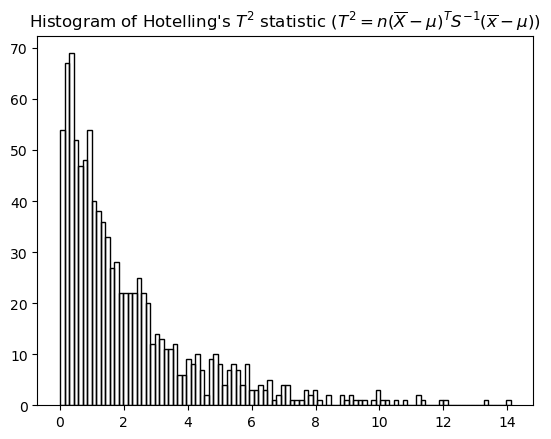

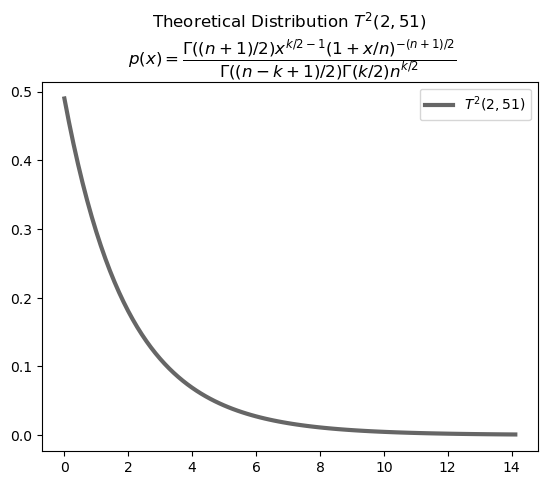

In [8]:
%run src\mc\samplings.py
hotelling_t2_stat()

<hr/><br/><br/>